In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\srini\Downloads\train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
null_percentages = df.isnull().sum().sort_values(ascending=False) / df.shape[0]

In [5]:
null_percentages[null_percentages > 0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [6]:
null_valued_cols = null_percentages[null_percentages > 0].index

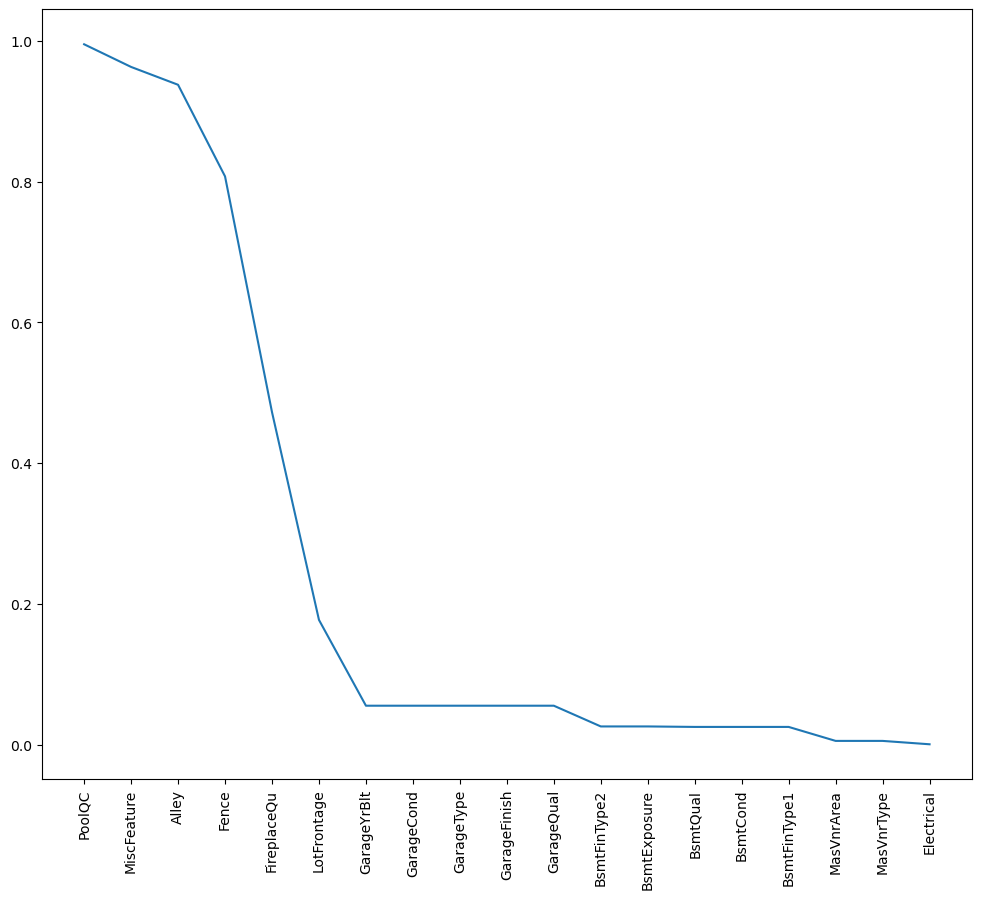

In [7]:
plt.figure(figsize=(12,10))
sns.lineplot(null_percentages[null_percentages > 0])
plt.xticks(rotation=90)
plt.show()


In [8]:
cat_cols = df[null_valued_cols].select_dtypes(['string','object']).columns

In [9]:
cat_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2',
       'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
       'Electrical'],
      dtype='object')

In [10]:
for i in cat_cols : 
    display(df[i].value_counts(dropna=False))

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

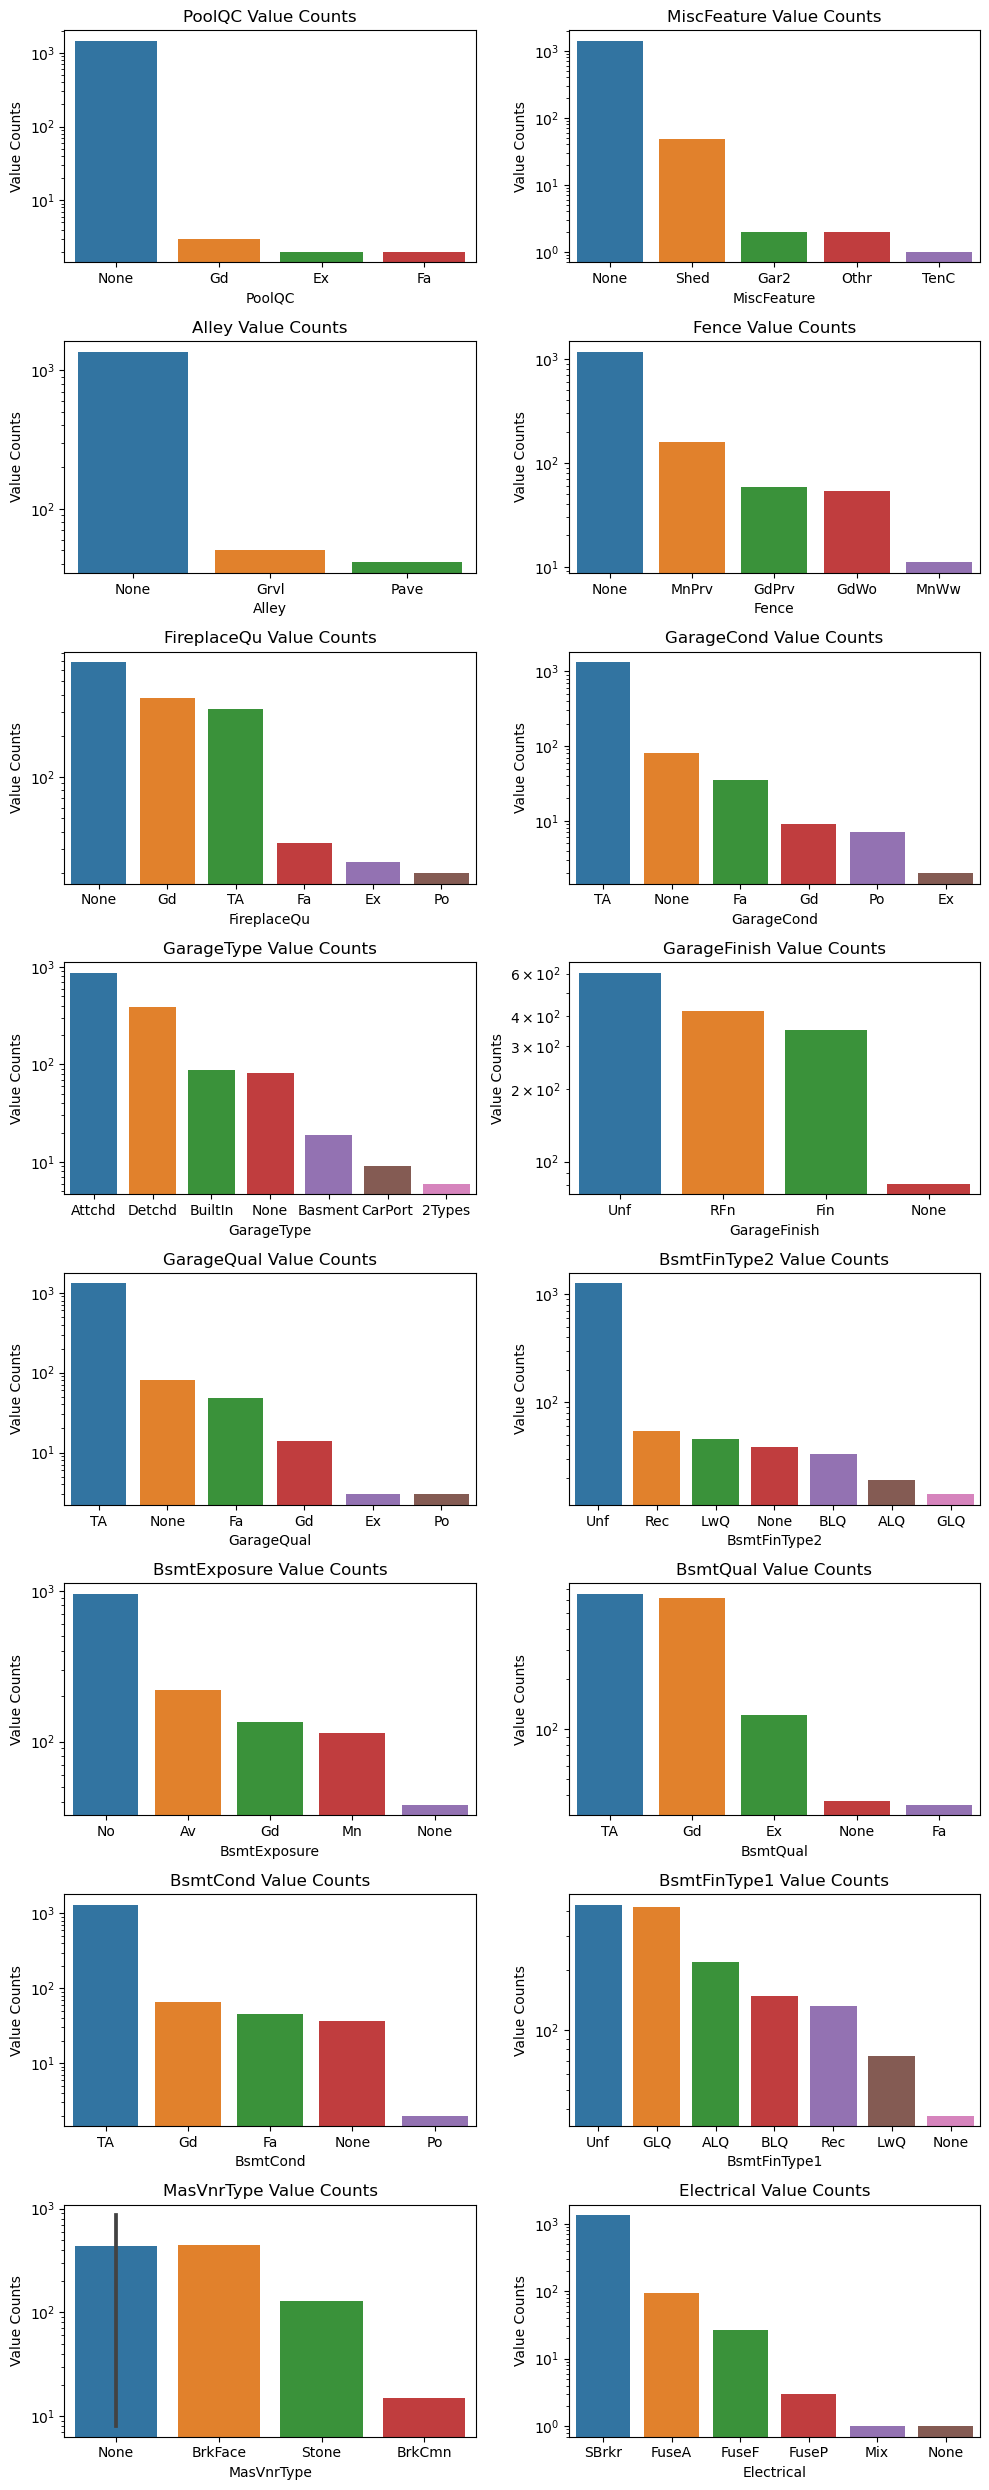

In [11]:
cols = 2
    
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    hdf = df[i].value_counts(dropna=False).reset_index().fillna('None')
    sns.barplot(data=hdf,x='index',y=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} Value Counts')
    ax[idx1,idx2].set_xlabel(i)
    ax[idx1,idx2].set_ylabel('Value Counts')
    ax[idx1,idx2].set_yscale('log')
    
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()


In [12]:
for i in  cat_cols: 
    display(df.groupby([i],dropna=False)['SalePrice'].median())

PoolQC
Ex     490000.0
Fa     215500.0
Gd     171000.0
NaN    162900.0
Name: SalePrice, dtype: float64

MiscFeature
Gar2    170750.0
Othr     94000.0
Shed    144000.0
TenC    250000.0
NaN     164250.0
Name: SalePrice, dtype: float64

Alley
Grvl    119500.0
Pave    172500.0
NaN     165000.0
Name: SalePrice, dtype: float64

Fence
GdPrv    167500.0
GdWo     138750.0
MnPrv    137450.0
MnWw     130000.0
NaN      173000.0
Name: SalePrice, dtype: float64

FireplaceQu
Ex     314250.0
Fa     158000.0
Gd     206950.0
Po     131500.0
TA     187500.0
NaN    135000.0
Name: SalePrice, dtype: float64

GarageCond
Ex     124000.0
Fa     114504.0
Gd     148000.0
Po     108000.0
TA     170000.0
NaN    100000.0
Name: SalePrice, dtype: float64

GarageType
2Types     159000.0
Attchd     185000.0
Basment    148000.0
BuiltIn    227500.0
CarPort    108000.0
Detchd     129500.0
NaN        100000.0
Name: SalePrice, dtype: float64

GarageFinish
Fin    215000.0
RFn    190000.0
Unf    135000.0
NaN    100000.0
Name: SalePrice, dtype: float64

GarageQual
Ex     127500.0
Fa     115000.0
Gd     209115.0
Po      96500.0
TA     170000.0
NaN    100000.0
Name: SalePrice, dtype: float64

BsmtFinType2
ALQ    174900.0
BLQ    143000.0
GLQ    203125.0
LwQ    154000.0
Rec    148750.0
Unf    167000.0
NaN    104025.0
Name: SalePrice, dtype: float64

BsmtExposure
Av     185850.0
Gd     226975.0
Mn     182450.0
No     154000.0
NaN    104025.0
Name: SalePrice, dtype: float64

BsmtQual
Ex     318000.0
Fa     112000.0
Gd     192070.0
TA     135500.0
NaN    101800.0
Name: SalePrice, dtype: float64

BsmtCond
Fa     118500.0
Gd     193879.0
Po      64000.0
TA     165000.0
NaN    101800.0
Name: SalePrice, dtype: float64

BsmtFinType1
ALQ    149250.0
BLQ    139100.0
GLQ    213750.0
LwQ    139000.0
Rec    142000.0
Unf    161750.0
NaN    101800.0
Name: SalePrice, dtype: float64

MasVnrType
BrkCmn     139000.0
BrkFace    181000.0
None       143000.0
Stone      246839.0
NaN        203287.0
Name: SalePrice, dtype: float64

Electrical
FuseA    121250.0
FuseF    115000.0
FuseP     82000.0
Mix       67000.0
SBrkr    170000.0
NaN      167500.0
Name: SalePrice, dtype: float64

- The null values here are not missing at random 
- The null values in PoolQC feature are Missing At Random , i.e they are missing when there is no pull 
- MiscFeature , Alley , Fence, FireplaceQu , Garage (All features with Garage prefix) are MAR 

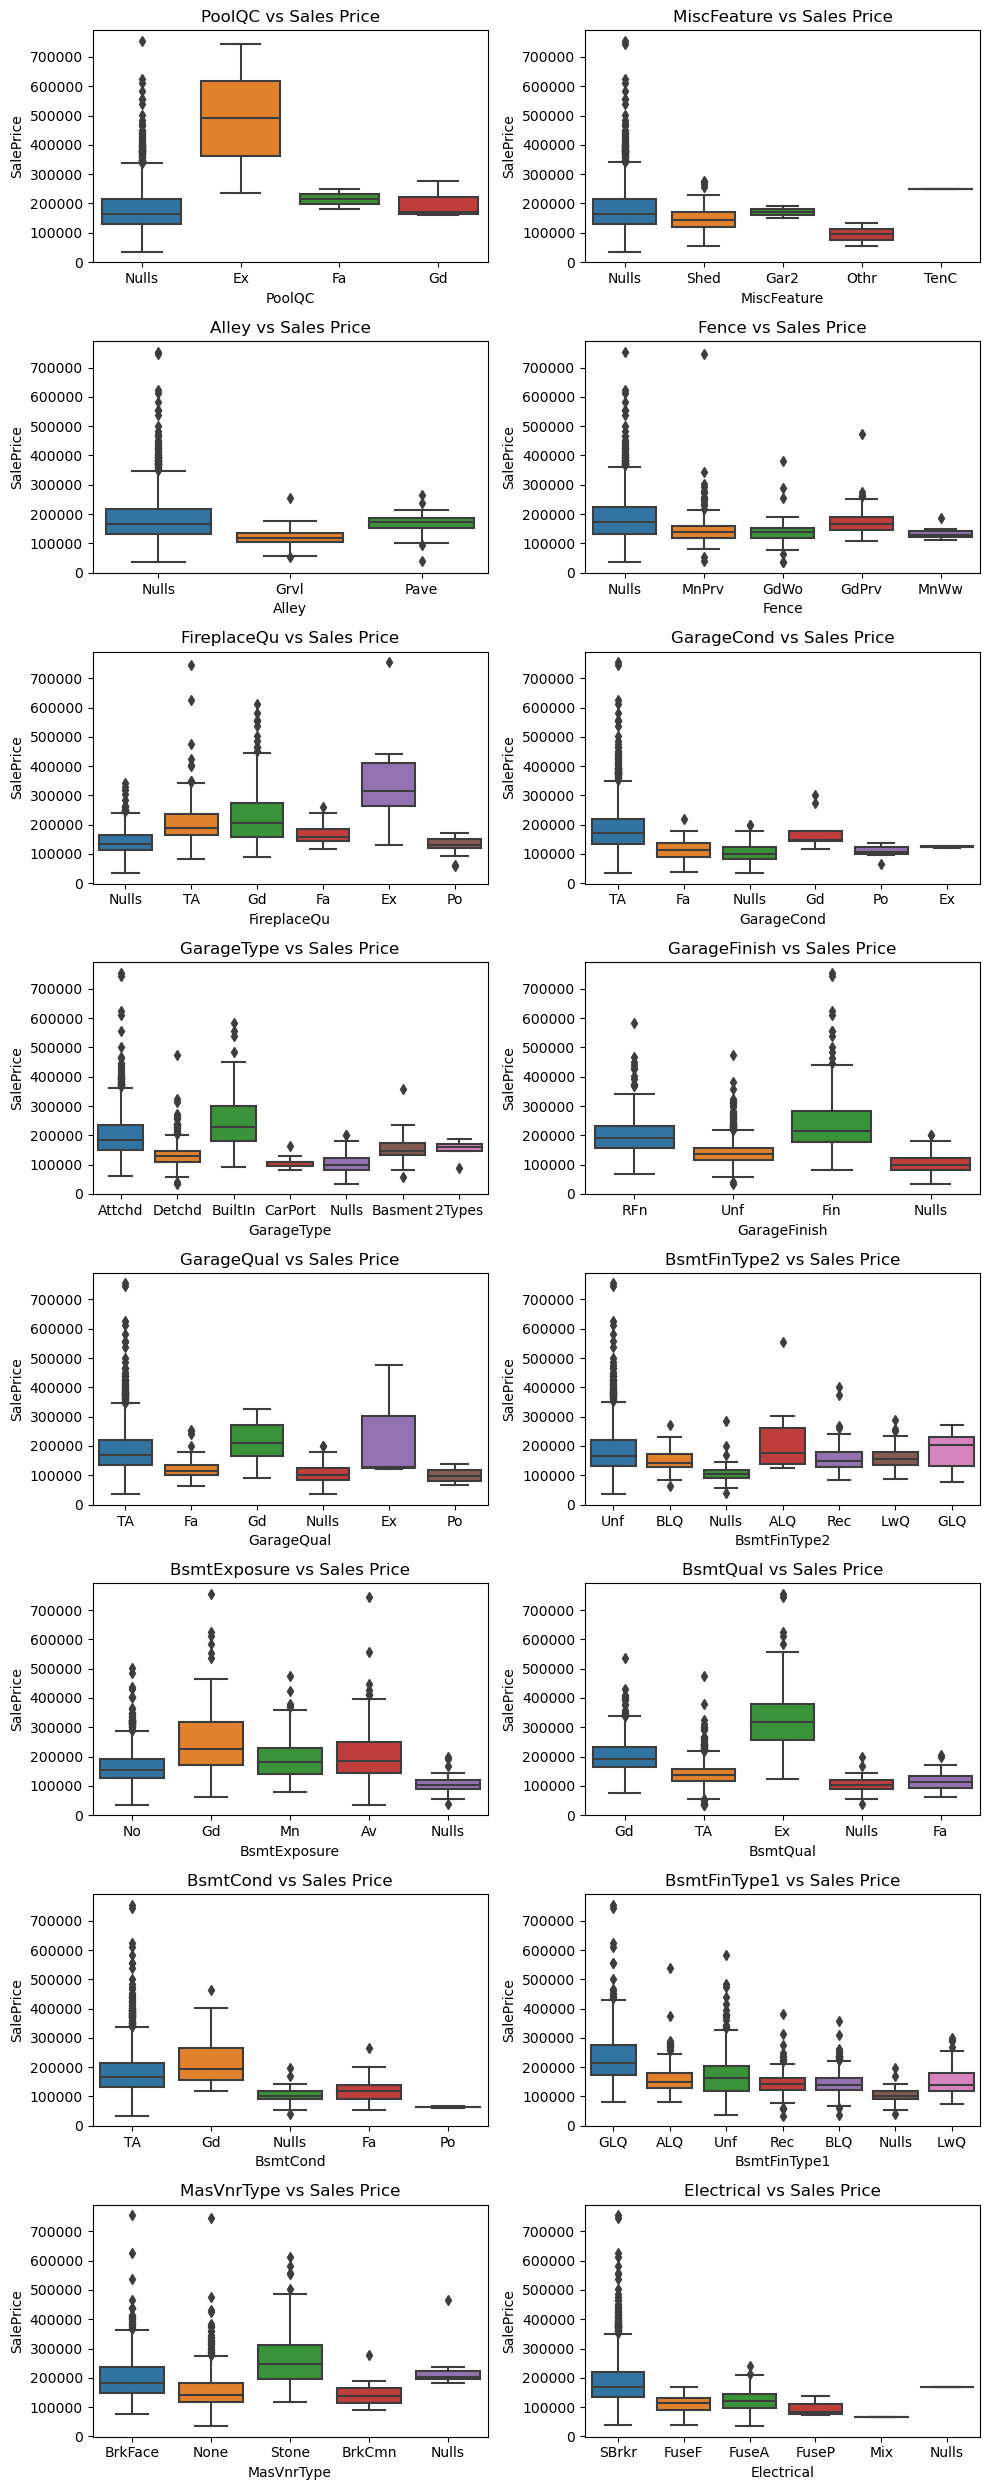

In [13]:
cols = 2
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.boxplot(data=df.fillna('Nulls'),x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

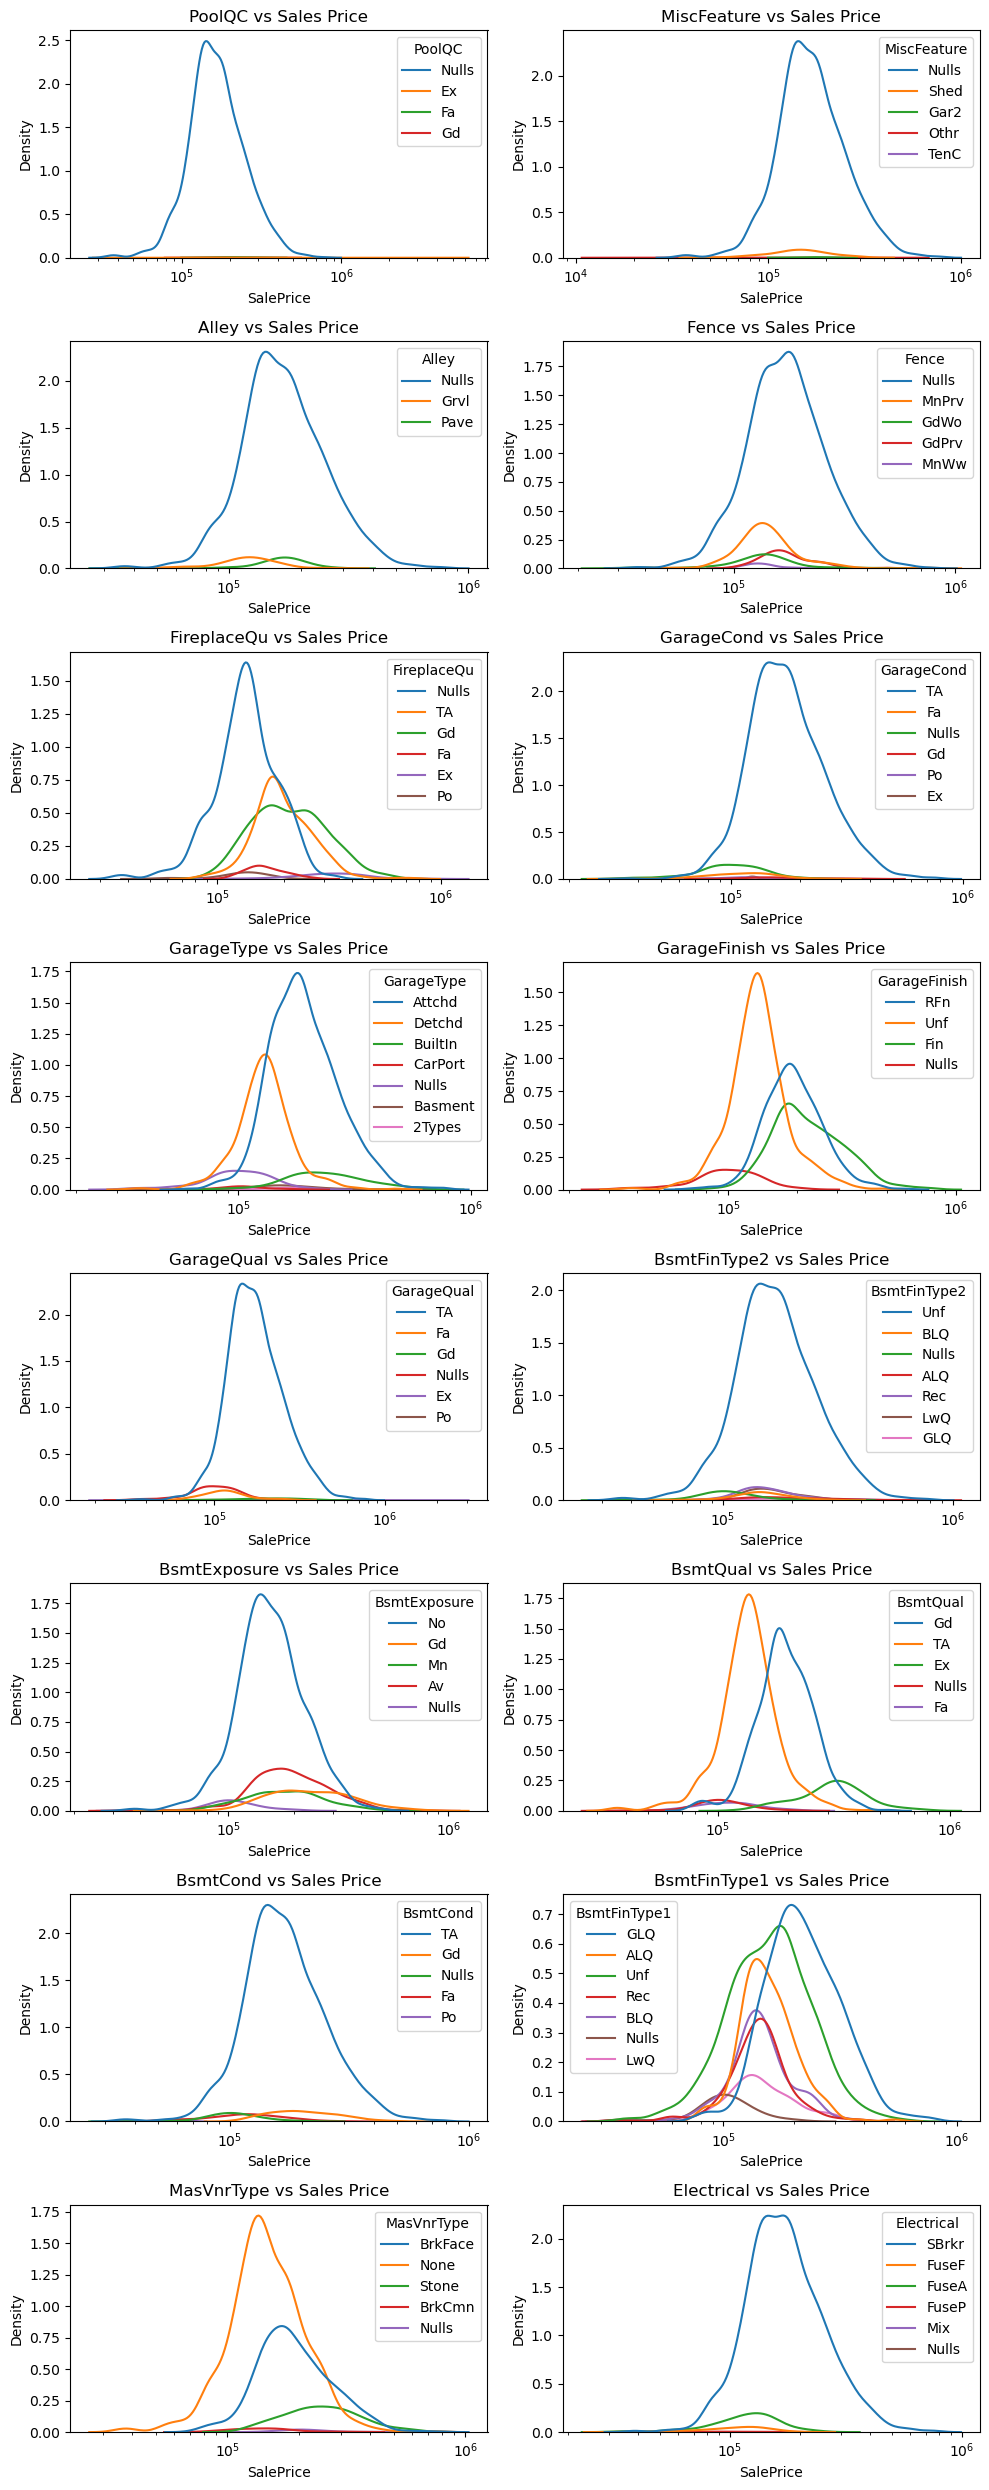

In [14]:
cols = 2
cat_cols = df[null_valued_cols].select_dtypes(['string','object']).columns
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.kdeplot(data=df.fillna('Nulls'),hue=i,x='SalePrice',ax=ax[idx1,idx2],log_scale=True)
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

## Impute MAR Values

In [15]:
# Here Null value means that the house just doesn't have the facility 
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['MiscFeature'] = df['PoolQC'].fillna('No Misc Feature')
df['Alley'] = df['Alley'].fillna('No Alley') 
df['Fence'] = df['Fence'].fillna('No Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fire Place')
df['MasVnrType'] = df['MasVnrType'].replace('None','No Masonry')


In [16]:
df = df[df['MasVnrType'].notnull()]

In [17]:
garage_cols = df.columns[df.columns.str.lower().str.contains(r'^gar')]

- It can be observed cleary that there are exactly 81 Null values in the Garage Categorical Columns
- This signifies that these records don't have a garage 

In [18]:
df[garage_cols].isnull().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64

In [19]:
df[garage_cols] = df[garage_cols].fillna('No Garage') 

In [20]:
bsmt_cols = df.columns[df.columns.str.lower().str.contains(r'^bsmt')]

- While 37 is noof records where there is no basement , there seem to be 2 defective records in Bsmnt Fin Type 2 and Bsmt Exposure

In [21]:
df[bsmt_cols].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [22]:
df.loc[df['BsmtExposure'].isnull(),bsmt_cols]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17        NaN      NaN          NaN          NaN           0          NaN   
39        NaN      NaN          NaN          NaN           0          NaN   
90        NaN      NaN          NaN          NaN           0          NaN   
102       NaN      NaN          NaN          NaN           0          NaN   
156       NaN      NaN          NaN          NaN           0          NaN   
182       NaN      NaN          NaN          NaN           0          NaN   
259       NaN      NaN          NaN          NaN           0          NaN   
342       NaN      NaN          NaN          NaN           0          NaN   
362       NaN      NaN          NaN          NaN           0          NaN   
371       NaN      NaN          NaN          NaN           0          NaN   
392       NaN      NaN          NaN          NaN           0          NaN   
520       NaN      NaN          NaN          NaN           0          NaN   
532       NaN      NaN          NaN          NaN           0          NaN   
533       NaN      NaN          NaN          NaN           0          NaN   
553       NaN      NaN          NaN          NaN           0          NaN   
646       NaN      NaN          NaN          NaN           0          NaN   
705       NaN      NaN          NaN          NaN           0          NaN   
736       NaN      NaN          NaN          NaN           0          NaN   
749       NaN      NaN          NaN          NaN           0          NaN   
778       NaN      NaN          NaN          NaN           0          NaN   
868       NaN      NaN          NaN          NaN           0          NaN   
894       NaN      NaN          NaN          NaN           0          NaN   
897       NaN      NaN          NaN          NaN           0          NaN   
948        Gd       TA          NaN          Unf           0          Unf   
984       NaN      NaN          NaN          NaN           0          NaN   
1000      NaN      NaN          NaN          NaN           0          NaN   
1011      NaN      NaN          NaN          NaN           0          NaN   
1035      NaN      NaN          NaN          NaN           0          NaN   
1045      NaN      NaN          NaN          NaN           0          NaN   
1048      NaN      NaN          NaN          NaN           0          NaN   
1049      NaN      NaN          NaN          NaN           0          NaN   
1090      NaN      NaN          NaN          NaN           0          NaN   
1179      NaN      NaN          NaN          NaN           0          NaN   
1216      NaN      NaN          NaN          NaN           0          NaN   
1218      NaN      NaN          NaN          NaN           0          NaN   
1232      NaN      NaN          NaN          NaN           0          NaN   
1321      NaN      NaN          NaN          NaN           0          NaN   
1412      NaN      NaN          NaN          NaN           0          NaN   

      BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
17             0          0             0             0  
39             0          0             0             0  
90             0          0             0             0  
102            0          0             0             0  
156            0          0             0             0  
182            0          0             0             0  
259            0          0             0             0  
342            0          0             0             0  
362            0          0             0             0  
371            0          0             0             0  
392            0          0             0             0  
520            0          0             0             0  
532            0          0             0             0  
533            0          0             0             0  
553            0          0             0             0  
646            0          0             0             0  
705            

In [23]:
df.loc[df['BsmtFinType2'].isnull(),bsmt_cols]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17        NaN      NaN          NaN          NaN           0          NaN   
39        NaN      NaN          NaN          NaN           0          NaN   
90        NaN      NaN          NaN          NaN           0          NaN   
102       NaN      NaN          NaN          NaN           0          NaN   
156       NaN      NaN          NaN          NaN           0          NaN   
182       NaN      NaN          NaN          NaN           0          NaN   
259       NaN      NaN          NaN          NaN           0          NaN   
332        Gd       TA           No          GLQ        1124          NaN   
342       NaN      NaN          NaN          NaN           0          NaN   
362       NaN      NaN          NaN          NaN           0          NaN   
371       NaN      NaN          NaN          NaN           0          NaN   
392       NaN      NaN          NaN          NaN           0          NaN   
520       NaN      NaN          NaN          NaN           0          NaN   
532       NaN      NaN          NaN          NaN           0          NaN   
533       NaN      NaN          NaN          NaN           0          NaN   
553       NaN      NaN          NaN          NaN           0          NaN   
646       NaN      NaN          NaN          NaN           0          NaN   
705       NaN      NaN          NaN          NaN           0          NaN   
736       NaN      NaN          NaN          NaN           0          NaN   
749       NaN      NaN          NaN          NaN           0          NaN   
778       NaN      NaN          NaN          NaN           0          NaN   
868       NaN      NaN          NaN          NaN           0          NaN   
894       NaN      NaN          NaN          NaN           0          NaN   
897       NaN      NaN          NaN          NaN           0          NaN   
984       NaN      NaN          NaN          NaN           0          NaN   
1000      NaN      NaN          NaN          NaN           0          NaN   
1011      NaN      NaN          NaN          NaN           0          NaN   
1035      NaN      NaN          NaN          NaN           0          NaN   
1045      NaN      NaN          NaN          NaN           0          NaN   
1048      NaN      NaN          NaN          NaN           0          NaN   
1049      NaN      NaN          NaN          NaN           0          NaN   
1090      NaN      NaN          NaN          NaN           0          NaN   
1179      NaN      NaN          NaN          NaN           0          NaN   
1216      NaN      NaN          NaN          NaN           0          NaN   
1218      NaN      NaN          NaN          NaN           0          NaN   
1232      NaN      NaN          NaN          NaN           0          NaN   
1321      NaN      NaN          NaN          NaN           0          NaN   
1412      NaN      NaN          NaN          NaN           0          NaN   

      BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
17             0          0             0             0  
39             0          0             0             0  
90             0          0             0             0  
102            0          0             0             0  
156            0          0             0             0  
182            0          0             0             0  
259            0          0             0             0  
332          479       1603             1             0  
342            0          0             0             0  
362            0          0             0             0  
371            0          0             0             0  
392            0          0             0             0  
520            0          0             0             0  
532            0          0             0             0  
533            0          0             0             0  
553            0          0             0             0  
646            

In [24]:
df.loc[df['BsmtFinType1'] == 'Unf',bsmt_cols]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
8          TA       TA           No          Unf           0          Unf   
13         Gd       TA           Av          Unf           0          Unf   
15         TA       TA           No          Unf           0          Unf   
20         Ex       TA           Av          Unf           0          Unf   
21         TA       TA           No          Unf           0          Unf   
...       ...      ...          ...          ...         ...          ...   
1448       Fa       TA           No          Unf           0          Unf   
1450       Gd       TA           No          Unf           0          Unf   
1451       Gd       TA           No          Unf           0          Unf   
1453       Gd       TA           No          Unf           0          Unf   
1455       Gd       TA           No          Unf           0          Unf   

      BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
8              0        952             0             0  
13             0       1494             0             0  
15             0        832             0             0  
20             0       1158             0             0  
21             0        637             0             0  
...          ...        ...           ...           ...  
1448           0        560             0             0  
1450           0        896             0             0  
1451           0       1573             0             0  
1453           0       1140             0             0  
1455           0        953             0             0  

[428 rows x 10 columns]

- None value in basement columns, means that there is no basement . But if this is true all other basement features should be none too . Since there all basement records are not null here , these values might be missing completely at random or there was a mistake during the data entry process 

In [25]:
df.loc[[332,948],bsmt_cols]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
332       Gd       TA           No          GLQ        1124          NaN   
948       Gd       TA          NaN          Unf           0          Unf   

     BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
332         479       1603             1             0  
948           0        936             0             0

In [26]:
# Drop both the rows
df = df.drop([332,948],axis=0)

In [27]:
# Impute Basement Cols
df[bsmt_cols] = df[bsmt_cols].fillna('No Basement')

In [28]:
df.loc[df['MasVnrArea'].isna(),['MasVnrArea','MasVnrType']]

Empty DataFrame
Columns: [MasVnrArea, MasVnrType]
Index: []

In [29]:
# As seen MasVnrArea is zero , when there is No Masonry Vernier , as such the area can be zero area of masonry vernier
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [30]:
df['LotFrontage'].describe()

count    1193.000000
mean       70.021794
std        24.305339
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [31]:
# LotFrontage value being null means that there is no area is 0 
df['LotFrontage'] = df['LotFrontage'].fillna(0) 

In [32]:
# Remove row where electrical is null
df =  df[df['Electrical'].notnull()]

In [33]:
# All Null values have been handled
df.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [34]:
# drop Id column 
df = df.drop('Id',axis=1)

In [35]:
cat_cols = df.select_dtypes(['string','object']).columns

In [36]:
df['MasVnrType'].value_counts()

No Masonry    863
BrkFace       443
Stone         128
BrkCmn         15
Name: MasVnrType, dtype: int64

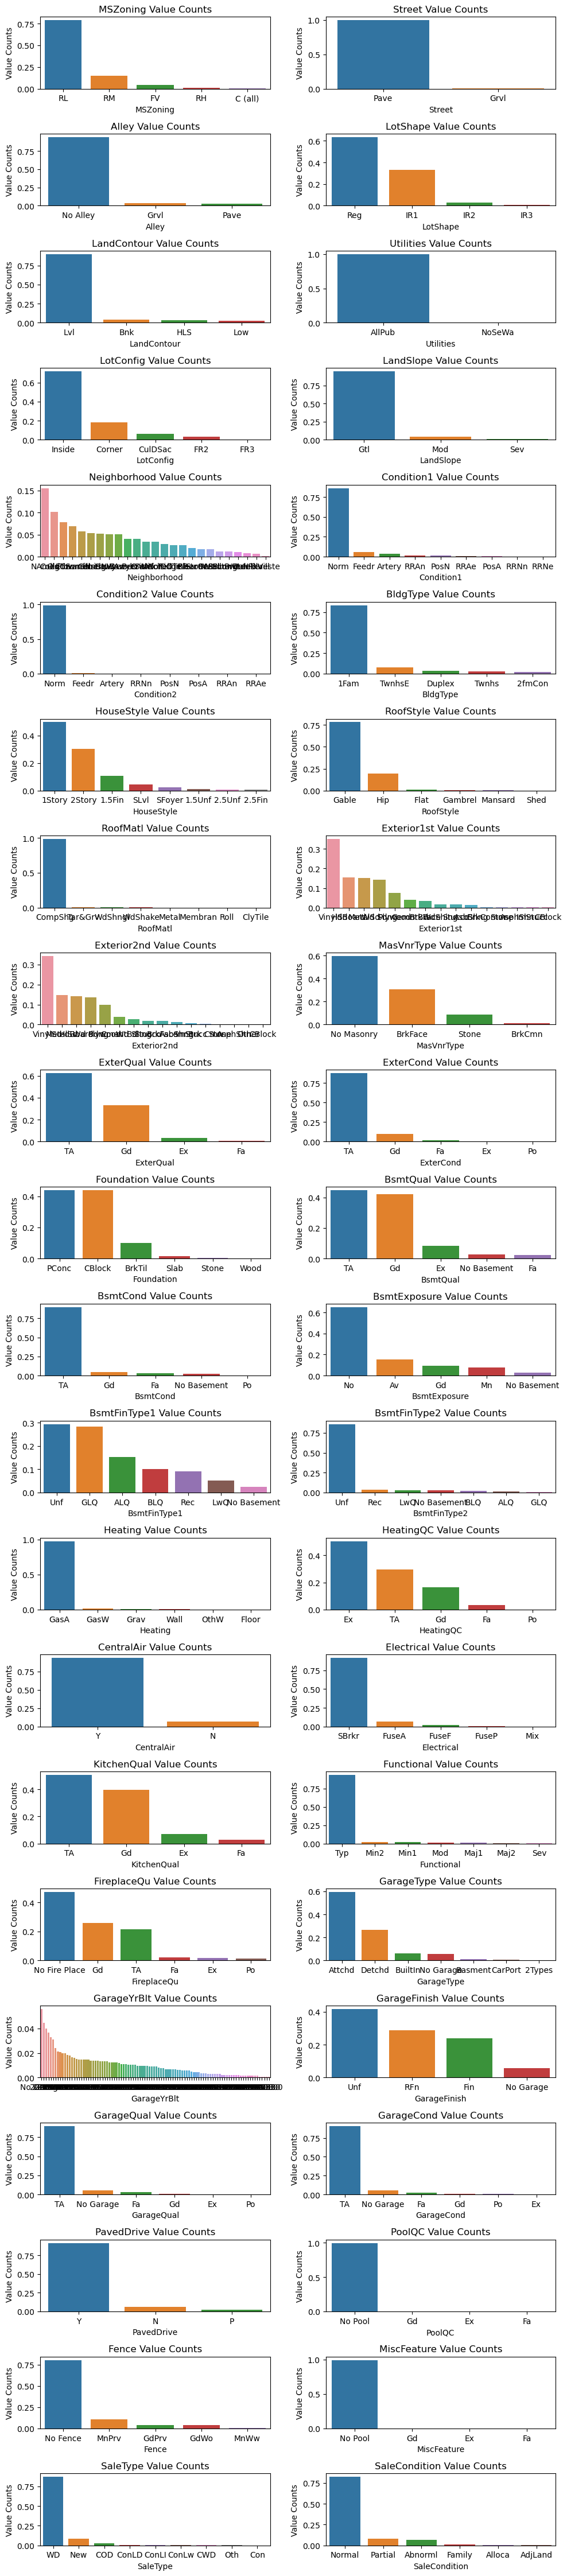

In [37]:
cols = 2
    
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,45))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    hdf = df[i].value_counts(dropna=False).reset_index().fillna('None')
    hdf.iloc[:,1] = hdf.iloc[:,1] / hdf.iloc[:,1].sum()
    sns.barplot(data=hdf,x='index',y=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} Value Counts')
    ax[idx1,idx2].set_xlabel(i)
    ax[idx1,idx2].set_ylabel('Value Counts')
#     ax[idx1,idx2].set_yscale('log')
    
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()


## Drop Categorical Features where majority of the categorical variables belong only a to certain class where a certain class has >=75%

In [38]:
# Drop Features where majority of the values belong a single category , as this will lead to unfair comparision
drop_cols = []
for i in cat_cols : 
    hdf = df[i].value_counts(dropna=False)
    hdf = hdf / hdf.sum()
    drop_cols.append(i if (hdf >= 0.7).any() else None)
drop_cols = list(filter(None,drop_cols))
df = df.drop(columns =drop_cols)

In [39]:
drop_cols

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [40]:
cat_cols = df.select_dtypes(['string','object']).columns

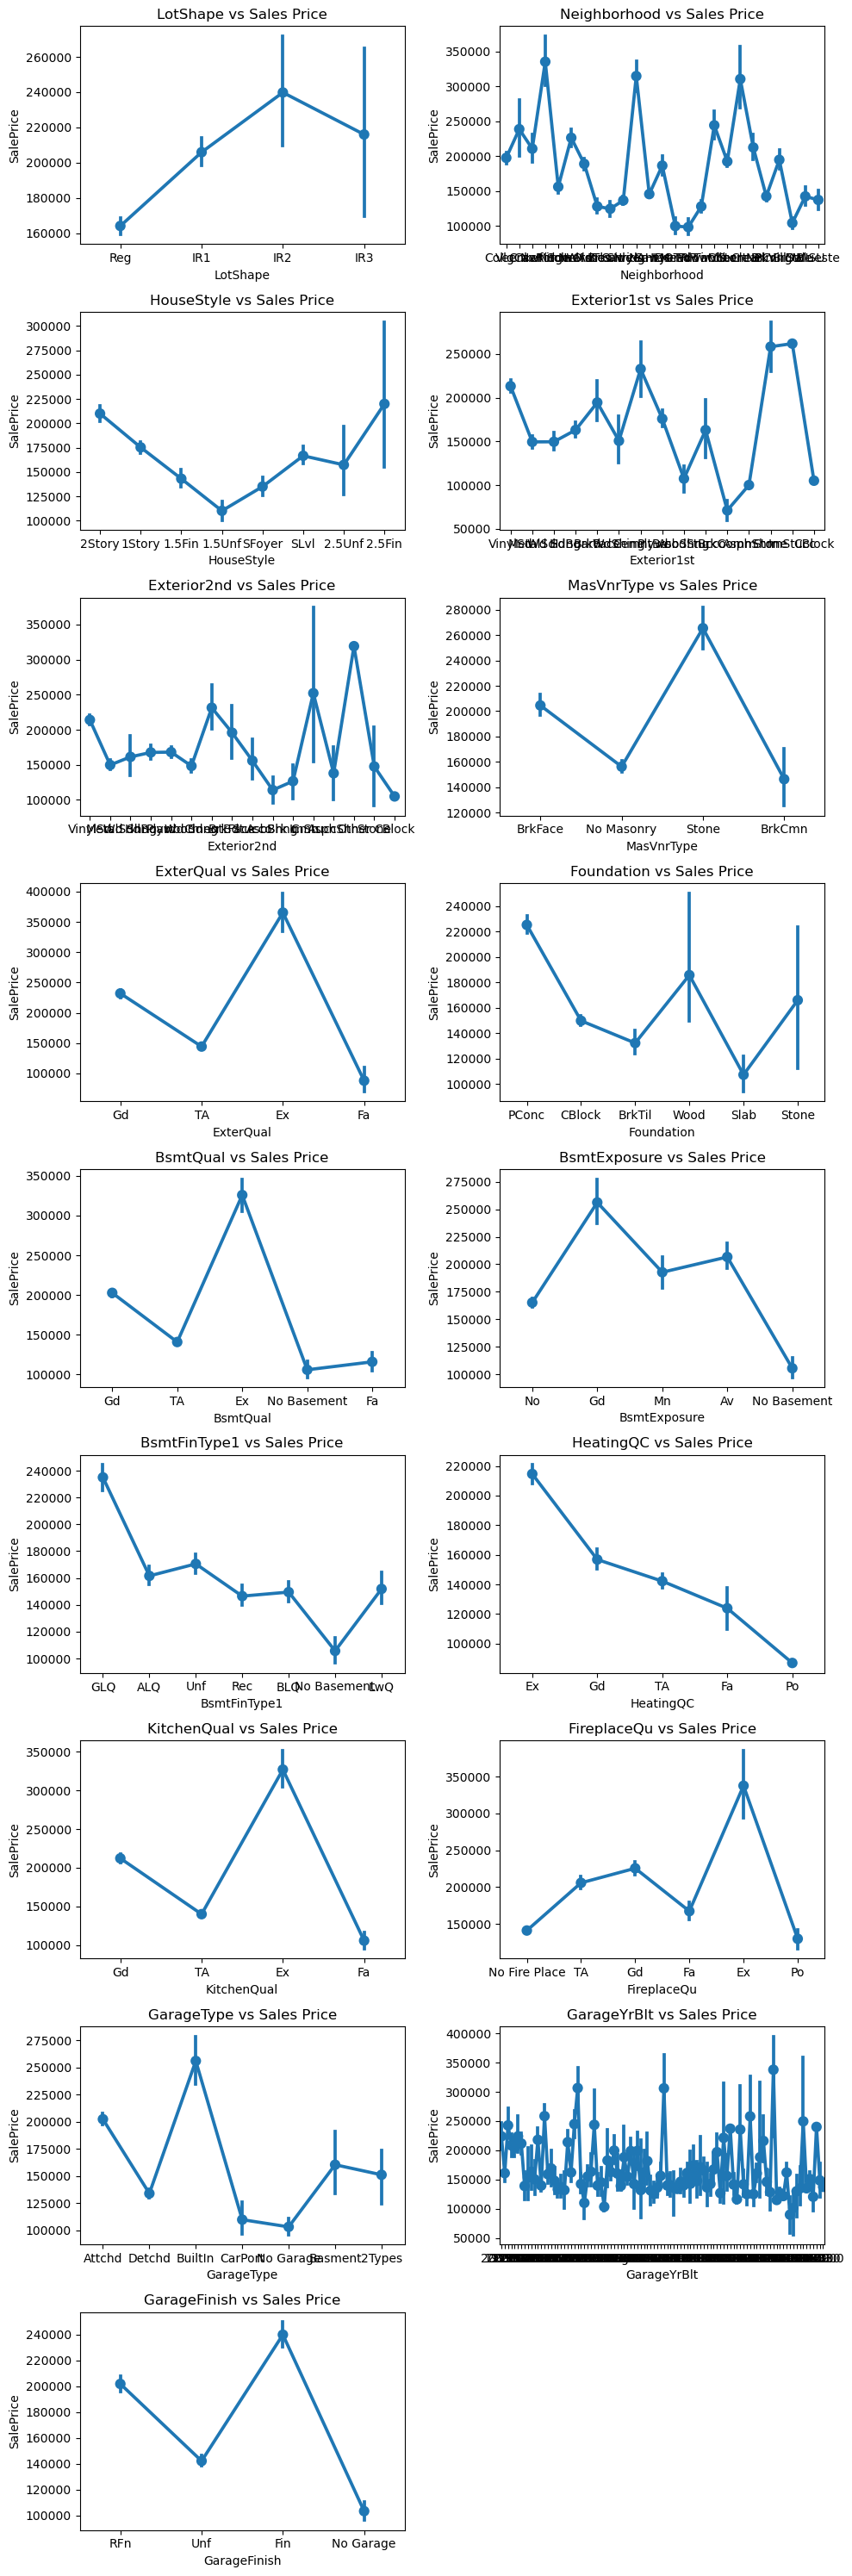

In [41]:
cols = 2
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,30))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.pointplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
#     ax[idx1,idx2].axvline(np.mean(df['SalePrice']))
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

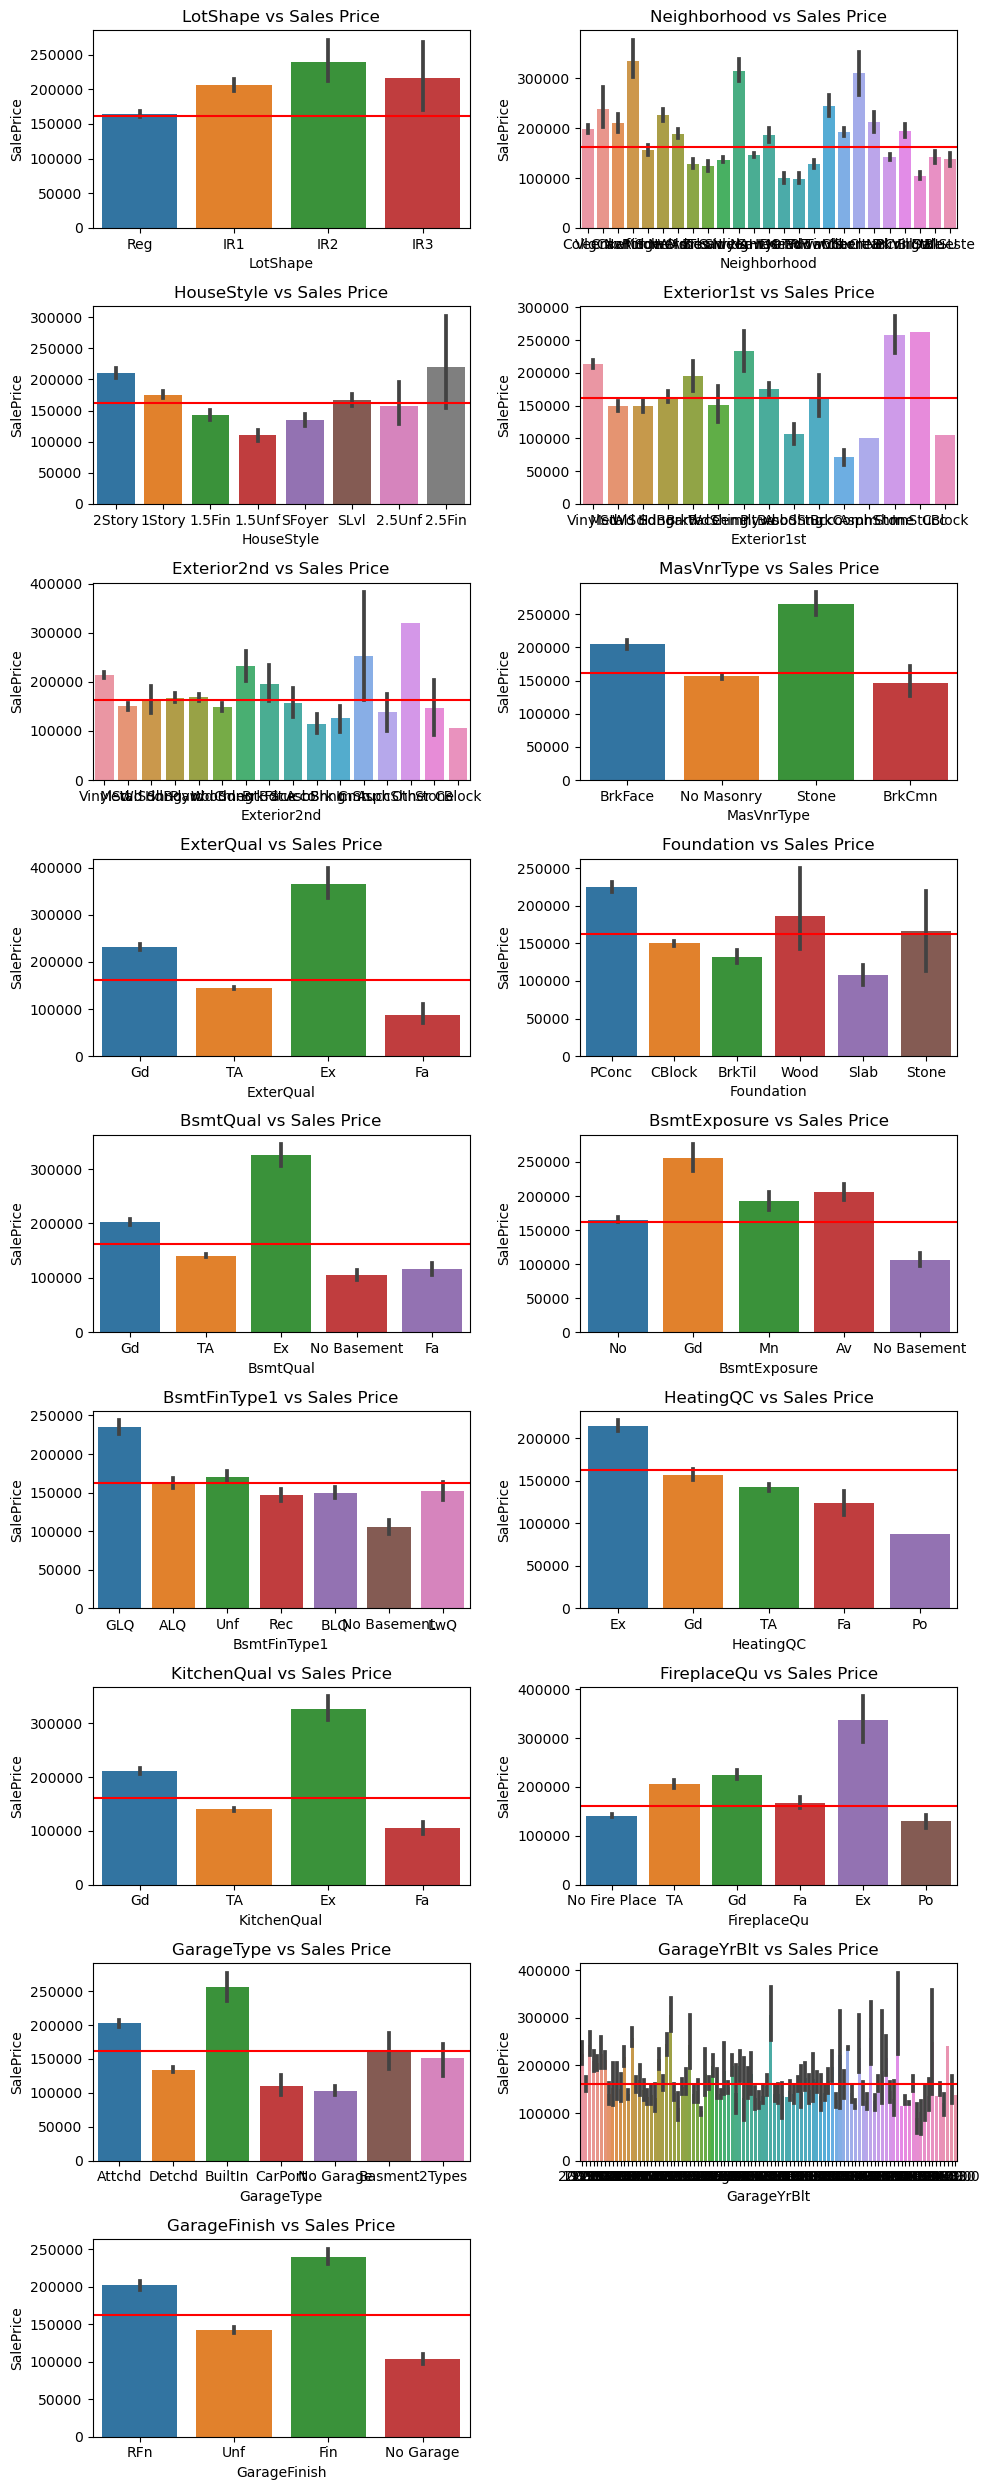

In [42]:
cols = 2
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.barplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
    ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

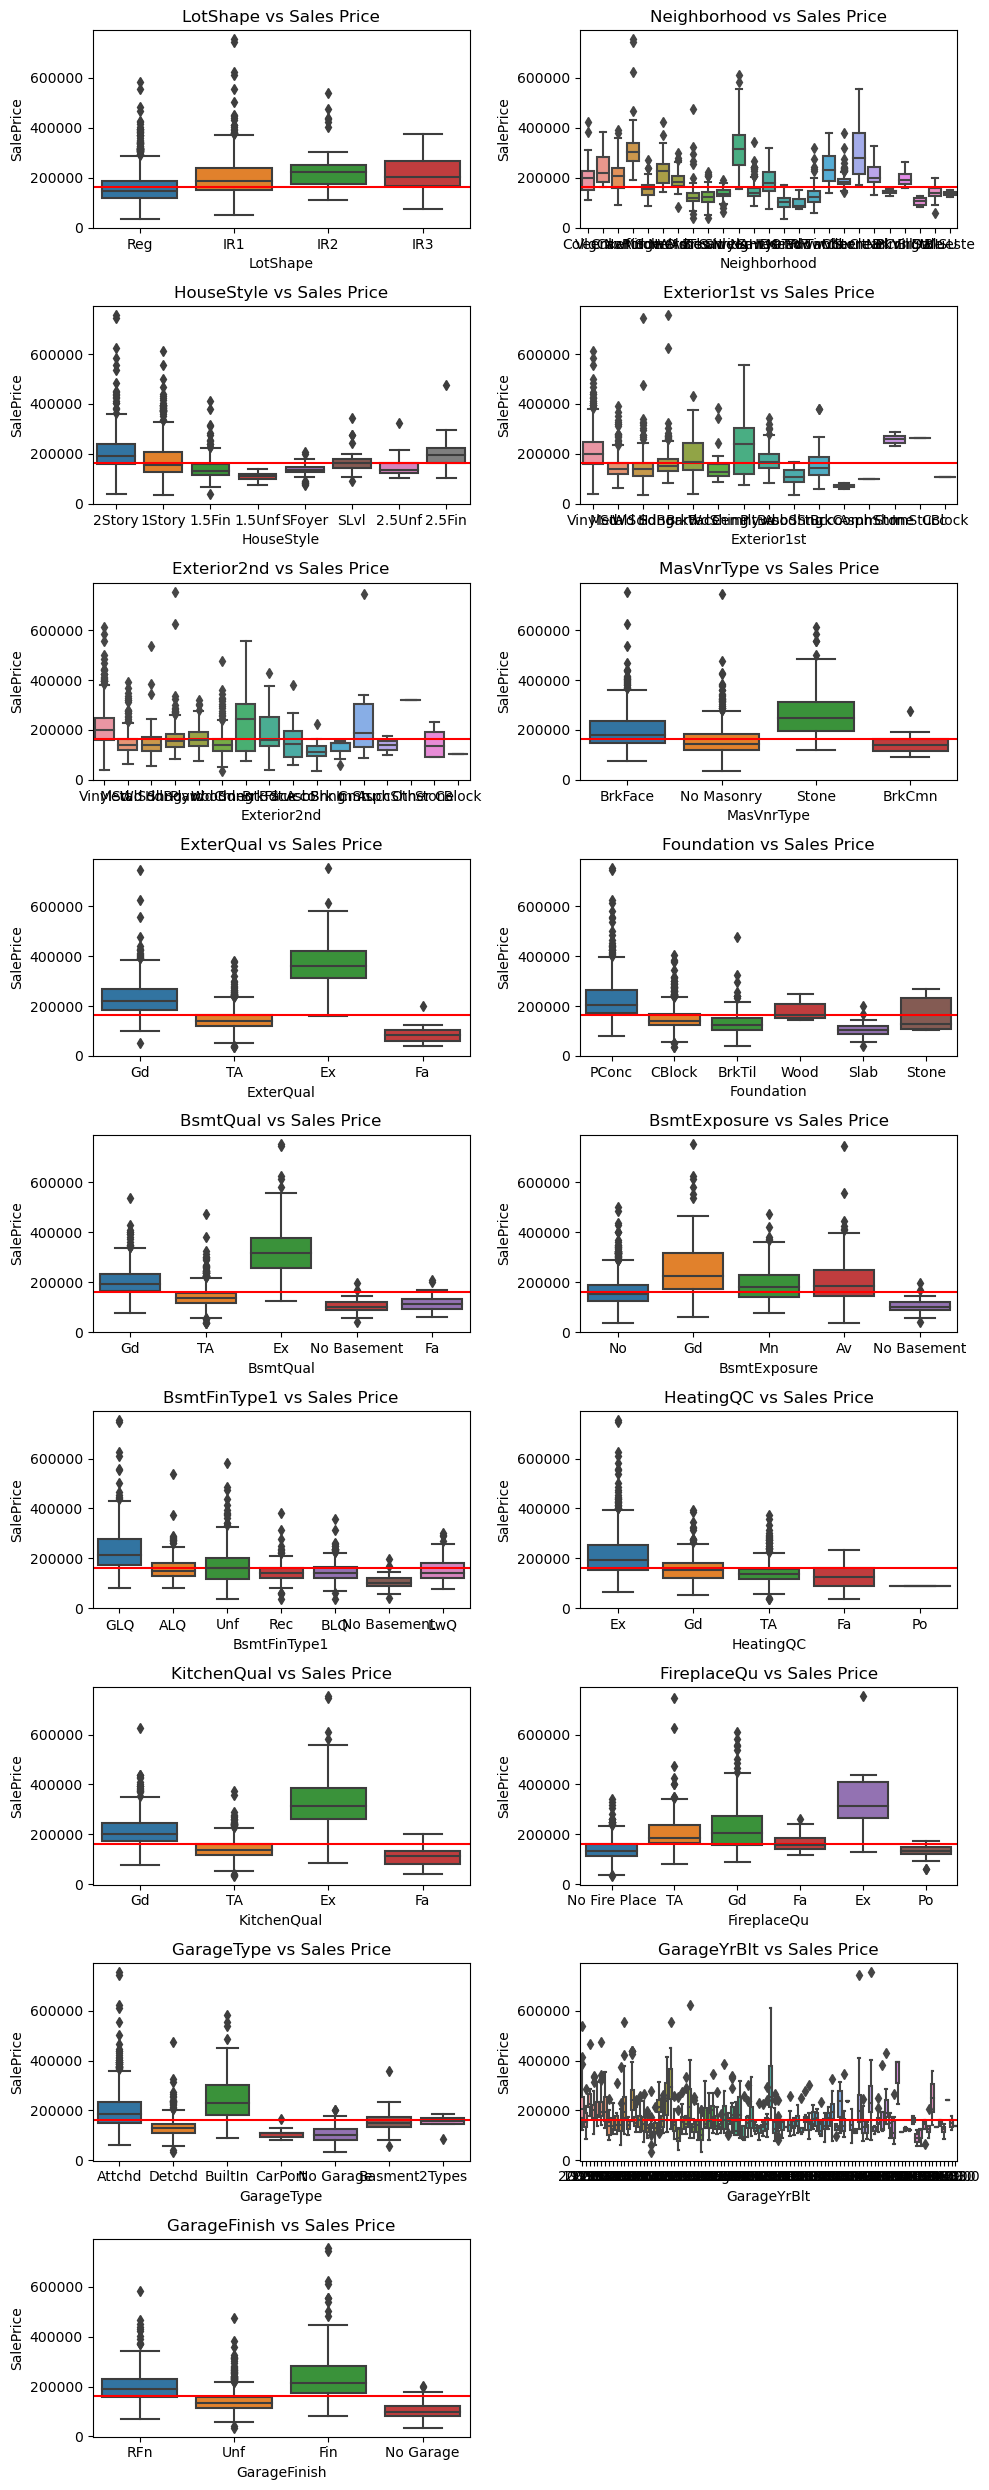

In [43]:
cols = 2
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.boxplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
    ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

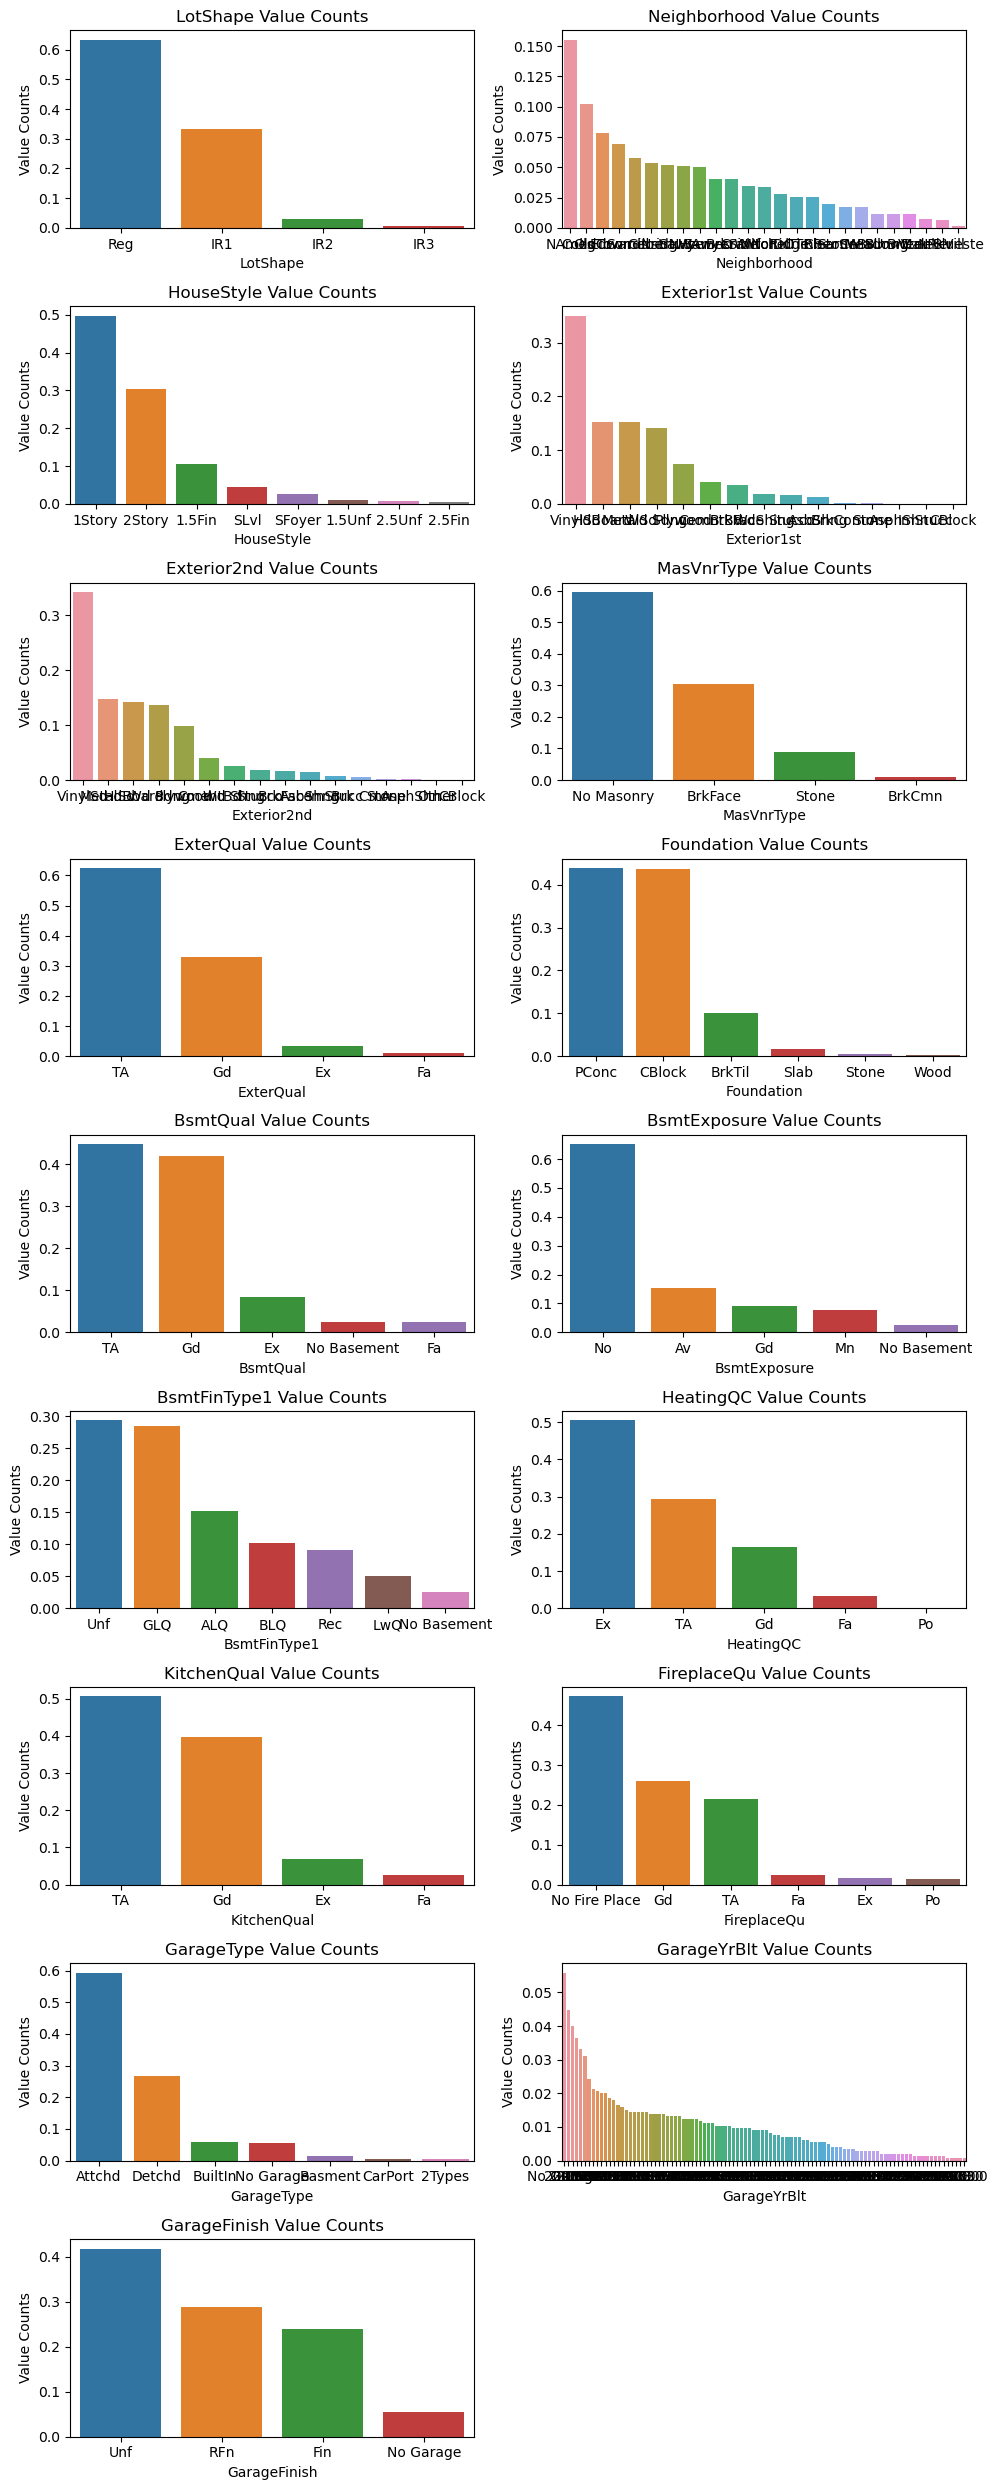

In [44]:
cols = 2
    
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    hdf = df[i].value_counts(dropna=False).reset_index().fillna('None')
    hdf.iloc[:,1] = hdf.iloc[:,1] / hdf.iloc[:,1].sum()
    sns.barplot(data=hdf,x='index',y=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} Value Counts')
    ax[idx1,idx2].set_xlabel(i)
    ax[idx1,idx2].set_ylabel('Value Counts')
#     ax[idx1,idx2].set_yscale('log')
    
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()


## Re-Create Bins for categorical variables

- This is based noof values present in each bin

In [45]:
# Re-Create bins for categorical variables
df['LotShape']  = df['LotShape'].replace({'IR2' : 'other_lot_types','IR3' : 'other_lot_types'})
df['Foundation']  = df['Foundation'].replace({'Slab' : 'other_foundation_types','Stone' : 'other_foundation_types','Wood' : 'other_foundation_types'})


In [46]:
house_df =df['HouseStyle'].value_counts() / df['HouseStyle'].value_counts().sum() < 0.05

In [47]:
col_house = house_df[house_df].index
df['HouseStyle'] = df['HouseStyle'].replace(col_house , 'other_house_styles')

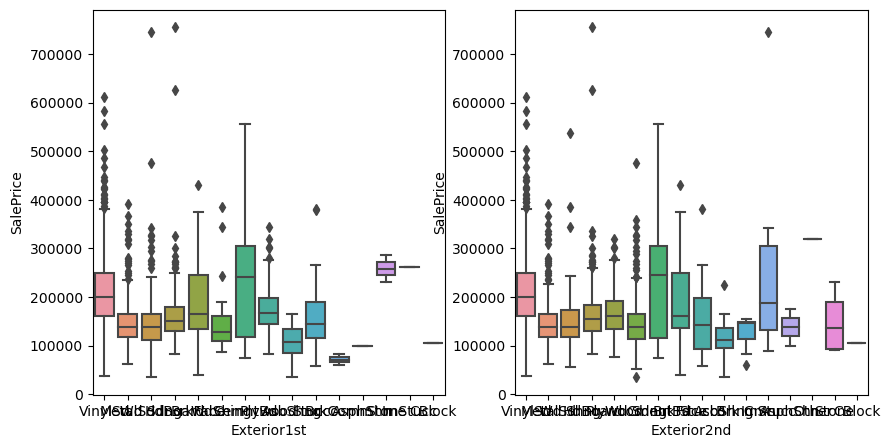

In [48]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df,x='Exterior1st',y='SalePrice',ax=ax[0])
sns.boxplot(data=df,x='Exterior2nd',y='SalePrice',ax=ax[1])
plt.show()


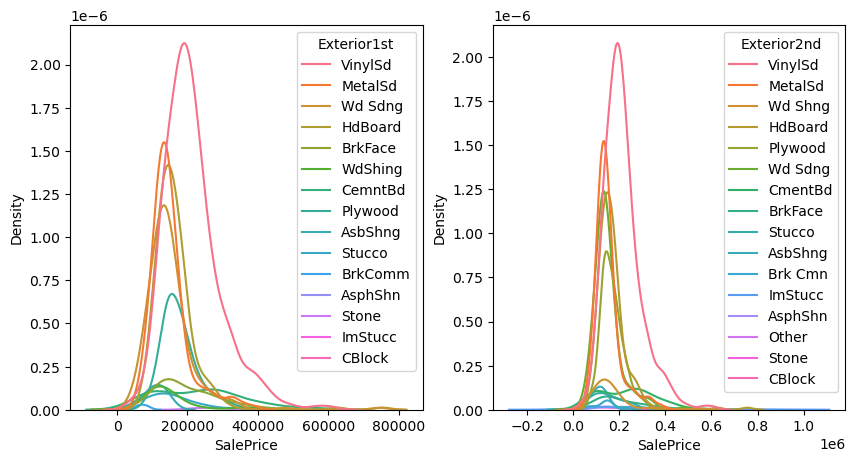

In [49]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(data=df,hue='Exterior1st',x='SalePrice',ax=ax[0])
sns.kdeplot(data=df,hue='Exterior2nd',x='SalePrice',ax=ax[1])
plt.show()


In [50]:
ext_df = df['Exterior1st'].value_counts() / df['Exterior1st'].value_counts().sum() < 0.02
ext = ext_df[ext_df].index
df['Exterior1st'] =  df['Exterior1st'].replace(col_house,'other_exterior_values')

In [51]:
df = df.drop('Exterior2nd',axis=1)

In [52]:
df['Neighborhood'].value_counts() / df['Neighborhood'].value_counts().sum()

NAmes      0.155280
CollgCr    0.102139
OldTown    0.077985
Edwards    0.069013
Somerst    0.057281
Gilbert    0.053830
NridgHt    0.051760
Sawyer     0.051070
NWAmes     0.050380
SawyerW    0.040028
BrkSide    0.040028
Crawfor    0.034507
Mitchel    0.033816
NoRidge    0.028295
IDOTRR     0.025535
Timber     0.025535
ClearCr    0.019324
StoneBr    0.017253
SWISU      0.017253
MeadowV    0.011732
Blmngtn    0.011732
BrDale     0.011042
Veenker    0.007591
NPkVill    0.006211
Blueste    0.001380
Name: Neighborhood, dtype: float64

<Axes: xlabel='Neighborhood'>

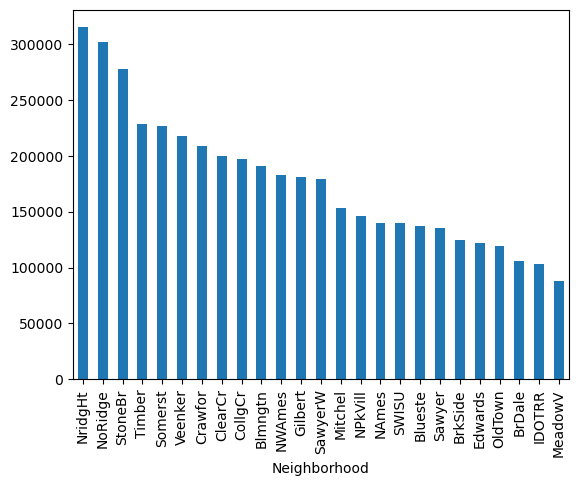

In [53]:
df.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False).plot(kind='bar')

In [54]:

df.groupby(['GarageYrBlt'])['SalePrice'].median().sort_values(ascending=False).head(20)

GarageYrBlt
2010.0    394432.0
2008.0    295493.0
2009.0    252678.0
1934.0    249550.0
2006.0    243289.0
1908.0    240000.0
2007.0    239000.0
1932.0    239000.0
1918.0    237000.0
1994.0    229000.0
2001.0    226500.0
2002.0    214900.0
1995.0    212250.0
2003.0    204250.0
1997.0    200000.0
1998.0    199900.0
1996.0    197000.0
1993.0    193750.0
1988.0    192750.0
2005.0    192500.0
Name: SalePrice, dtype: float64

In [55]:
df = df.drop('GarageYrBlt',axis=1)

In [56]:
numeric_cols = df.select_dtypes('number').columns
numeric_cols = list(filter(lambda x : x != 'SalePrice',numeric_cols))
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

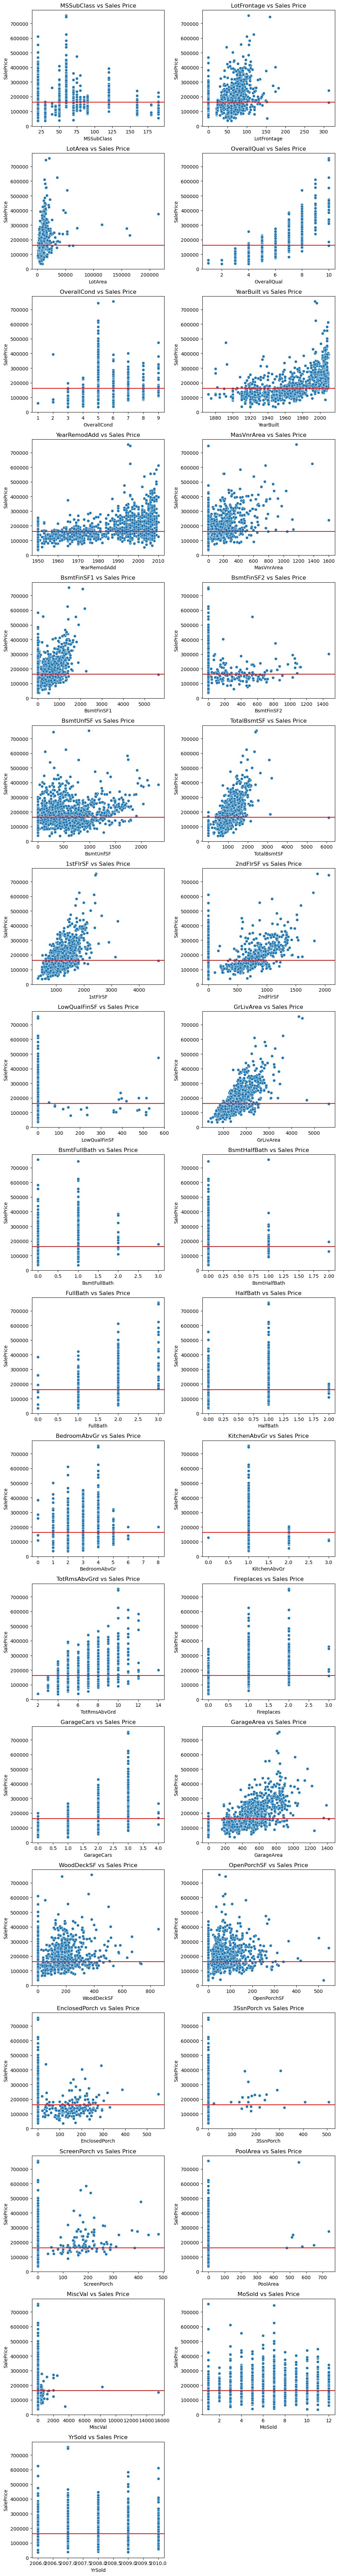

In [57]:
cols = 2
rows = np.ceil(len(numeric_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,75))
for idx,i in enumerate(numeric_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.scatterplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
    ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

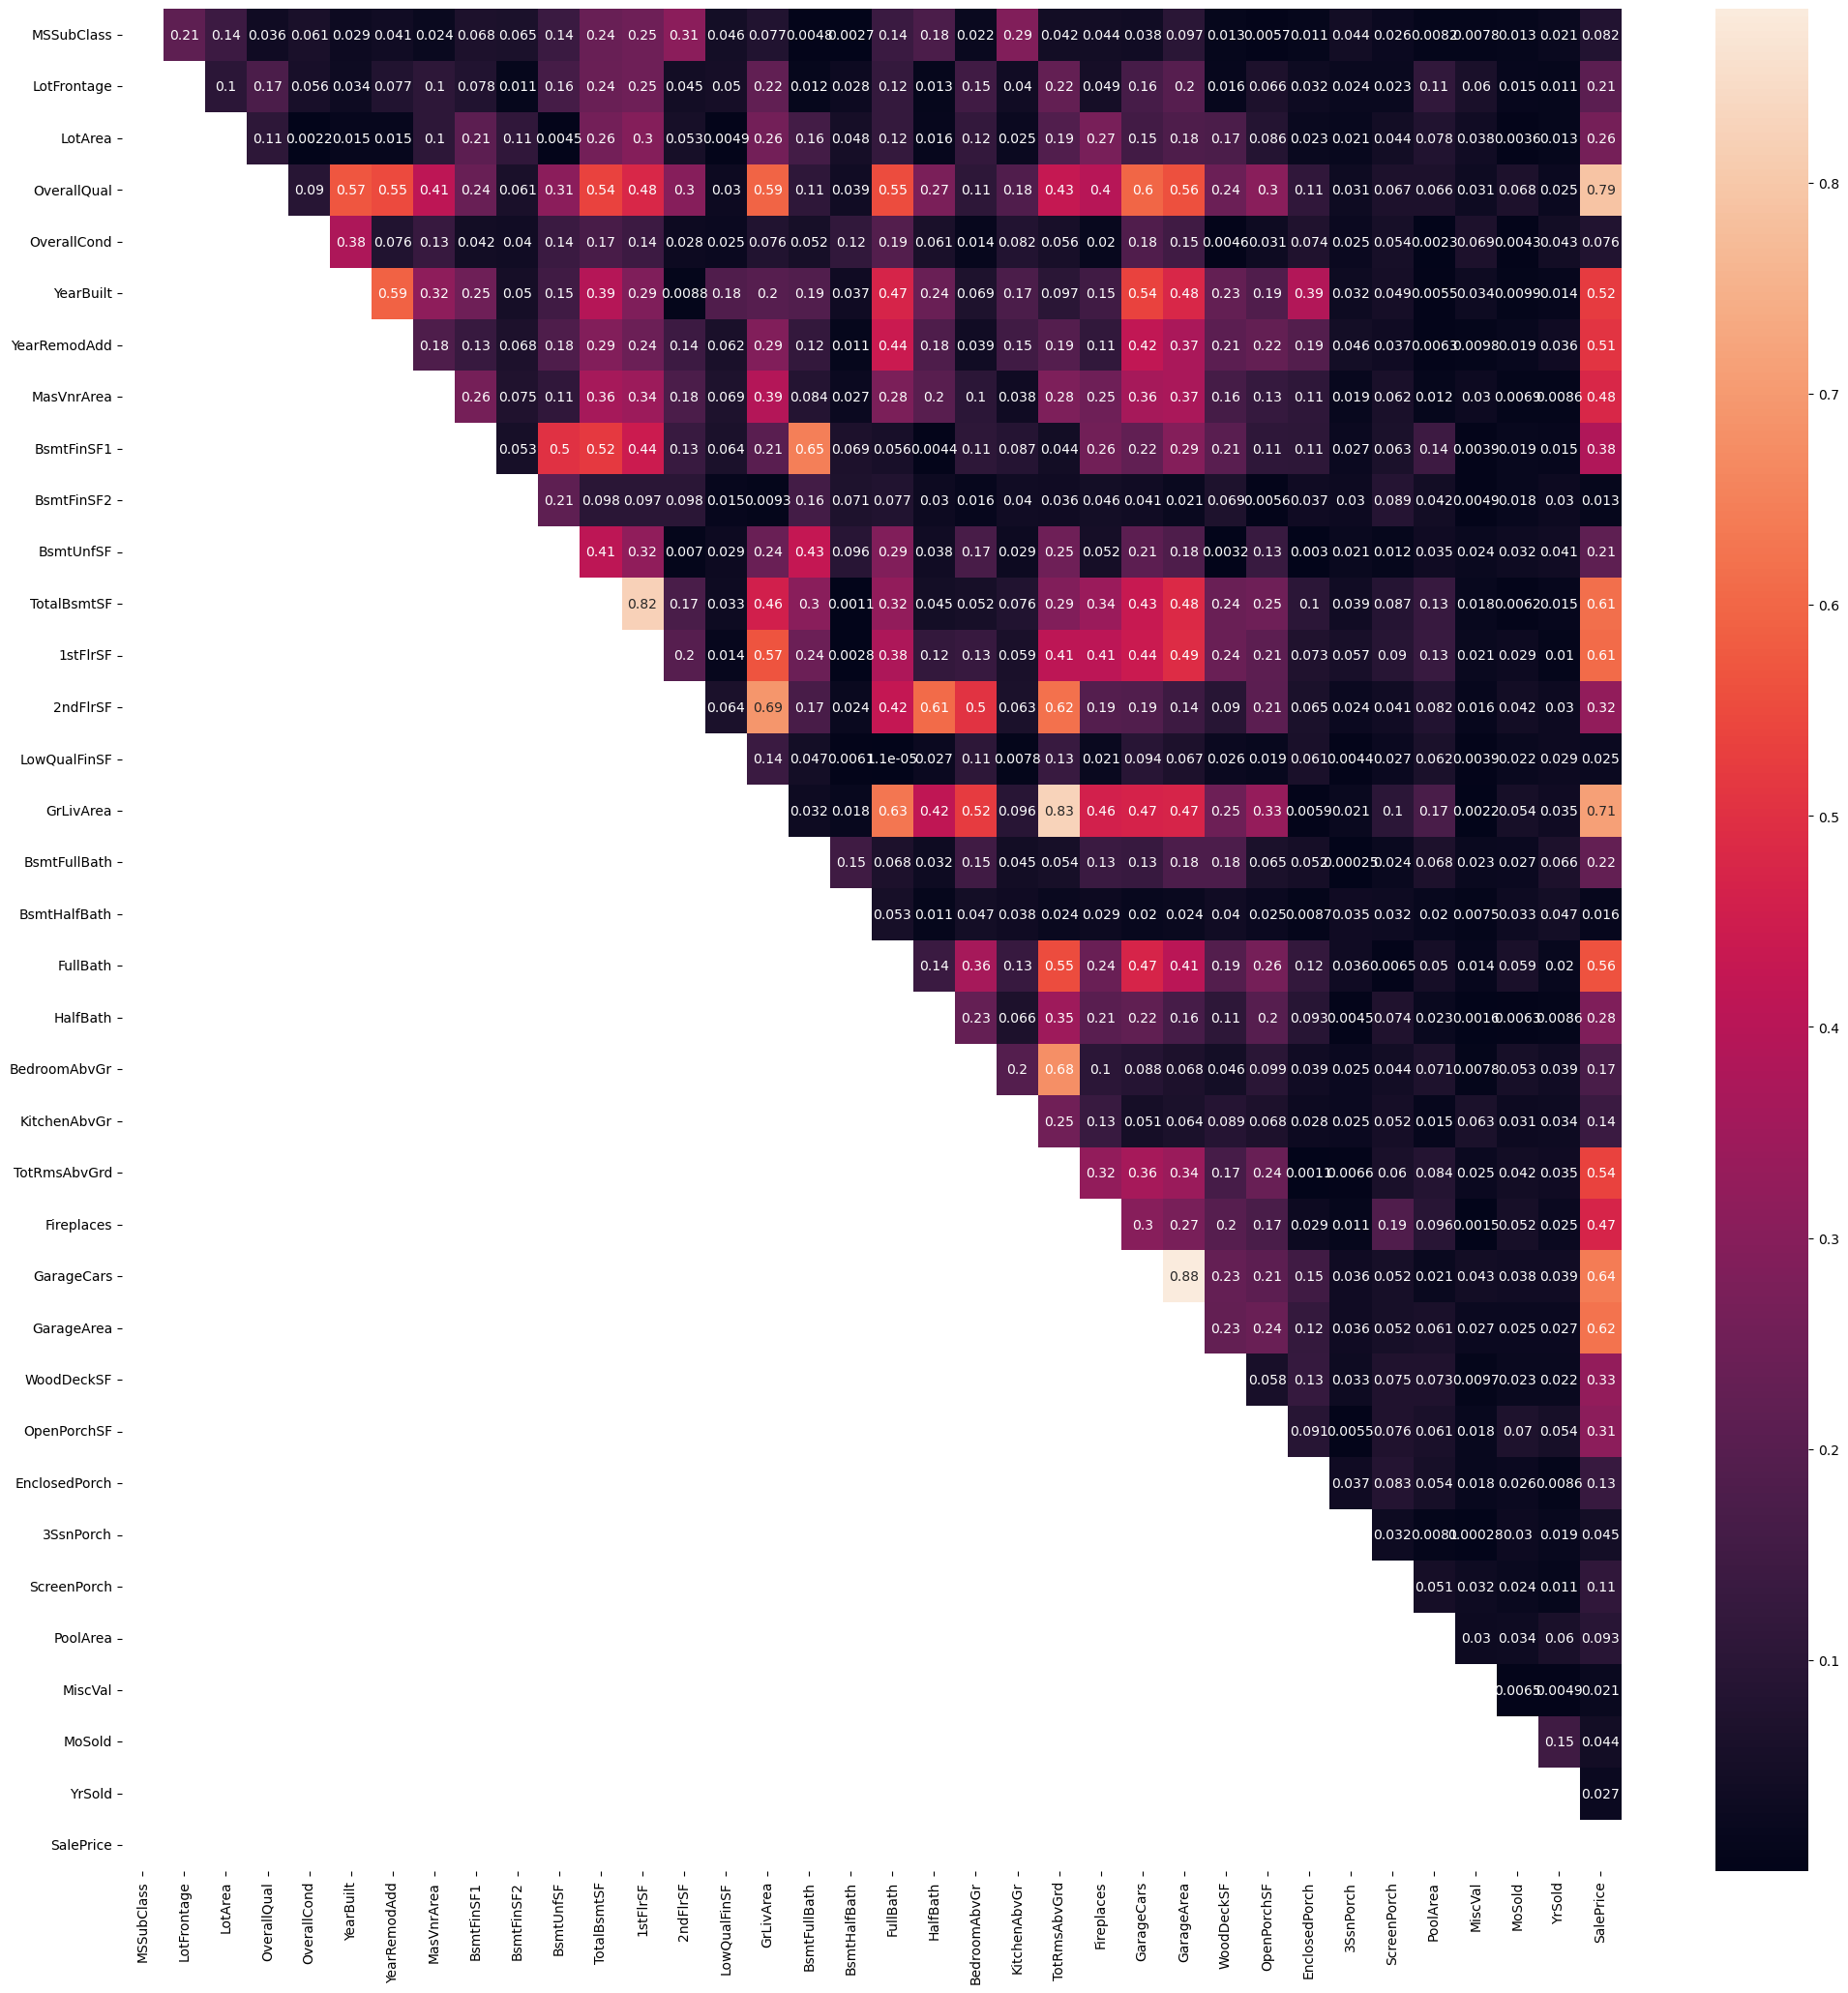

In [58]:
plt.figure(figsize=(25,25))
corr_mat = df.corr()
heat_mat = corr_mat.where(np.triu(np.ones_like(corr_mat),k=1).astype('bool'))
sns.heatmap(abs(heat_mat),annot=True)
plt.show()

In [59]:
# numeric_cols = list(set(np.concatenate([list((heat_mat[col] >= 0.5)[heat_mat[col] >= 0.5].index) for col in heat_mat.columns])))

In [60]:
corr_sales_price = heat_mat['SalePrice']

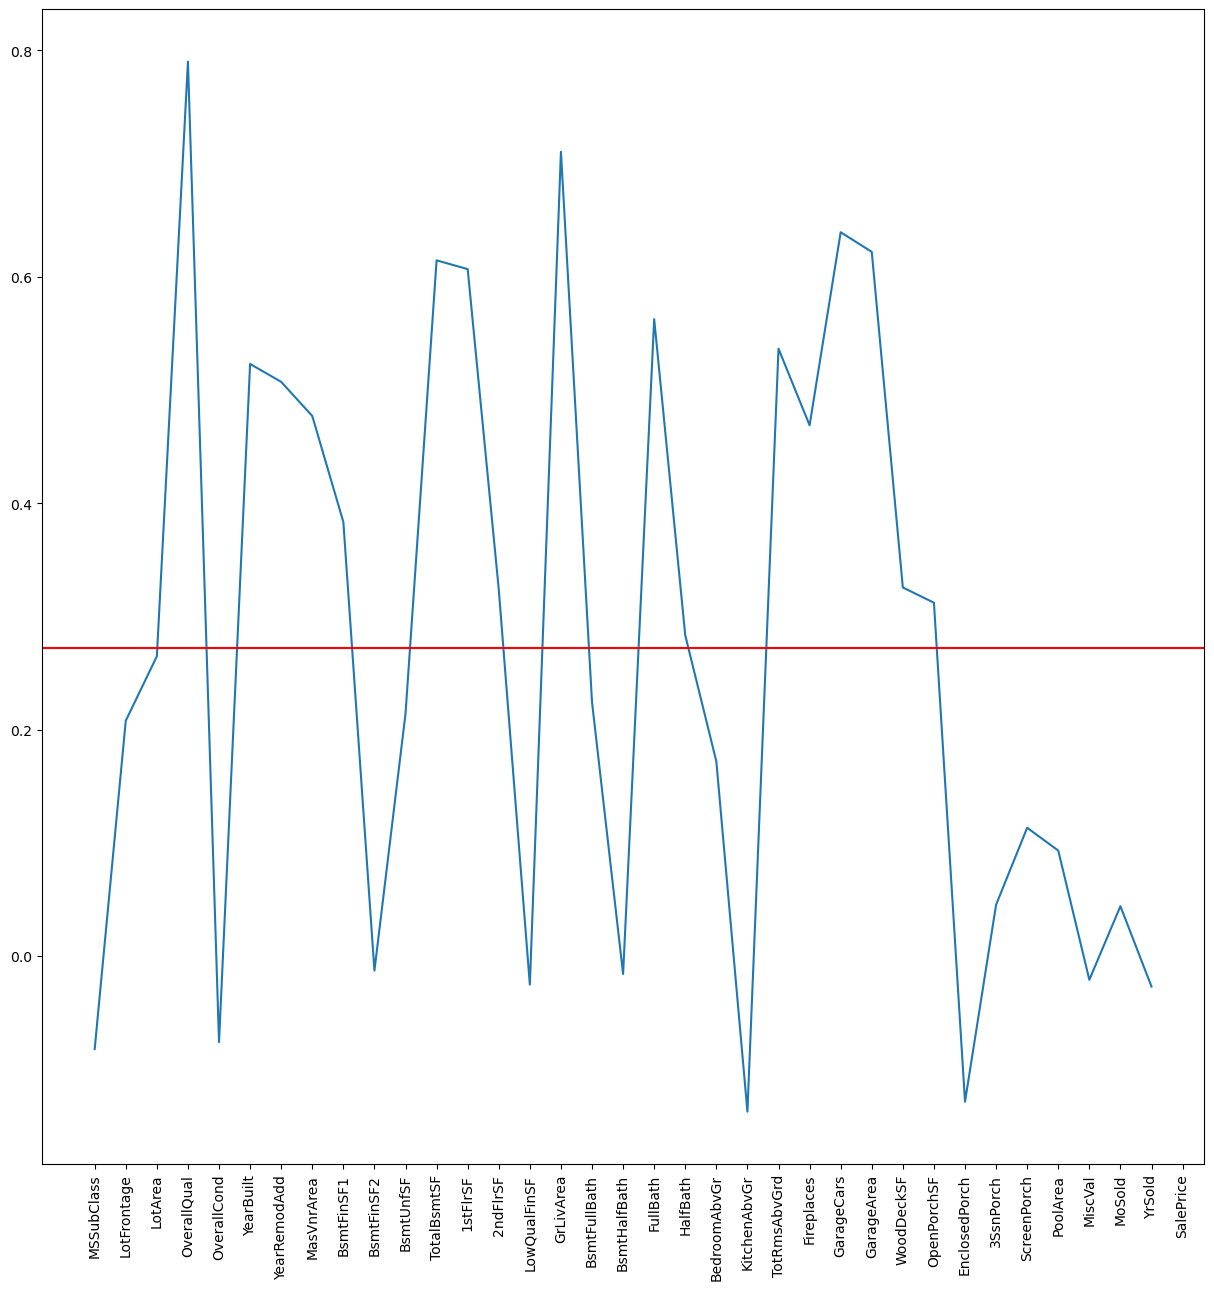

In [61]:
plt.figure(figsize=(15,15))
plt.plot(corr_sales_price)
plt.axhline(corr_sales_price.mean(),color='r')
plt.xticks(rotation=90)
plt.show()

In [62]:
numeric_cols = corr_sales_price[corr_sales_price < corr_sales_price.mean()].index

In [63]:
df = df.drop(numeric_cols,axis=1)

In [64]:
df.shape

(1449, 33)

In [66]:
numeric_cols = df.select_dtypes('number').columns

In [67]:
cat_cols = df.select_dtypes(['string','object'])

In [68]:
for i in cat_cols : 
    df[i]  = df[i].astype('category')

In [69]:
df = pd.concat([df] + [pd.get_dummies(df[i],drop_first=True) for i in cat_cols],axis=1)
df = df.drop(cat_cols,axis=1)

In [72]:
numeric_cols = [i for i in numeric_cols if i in df.columns]

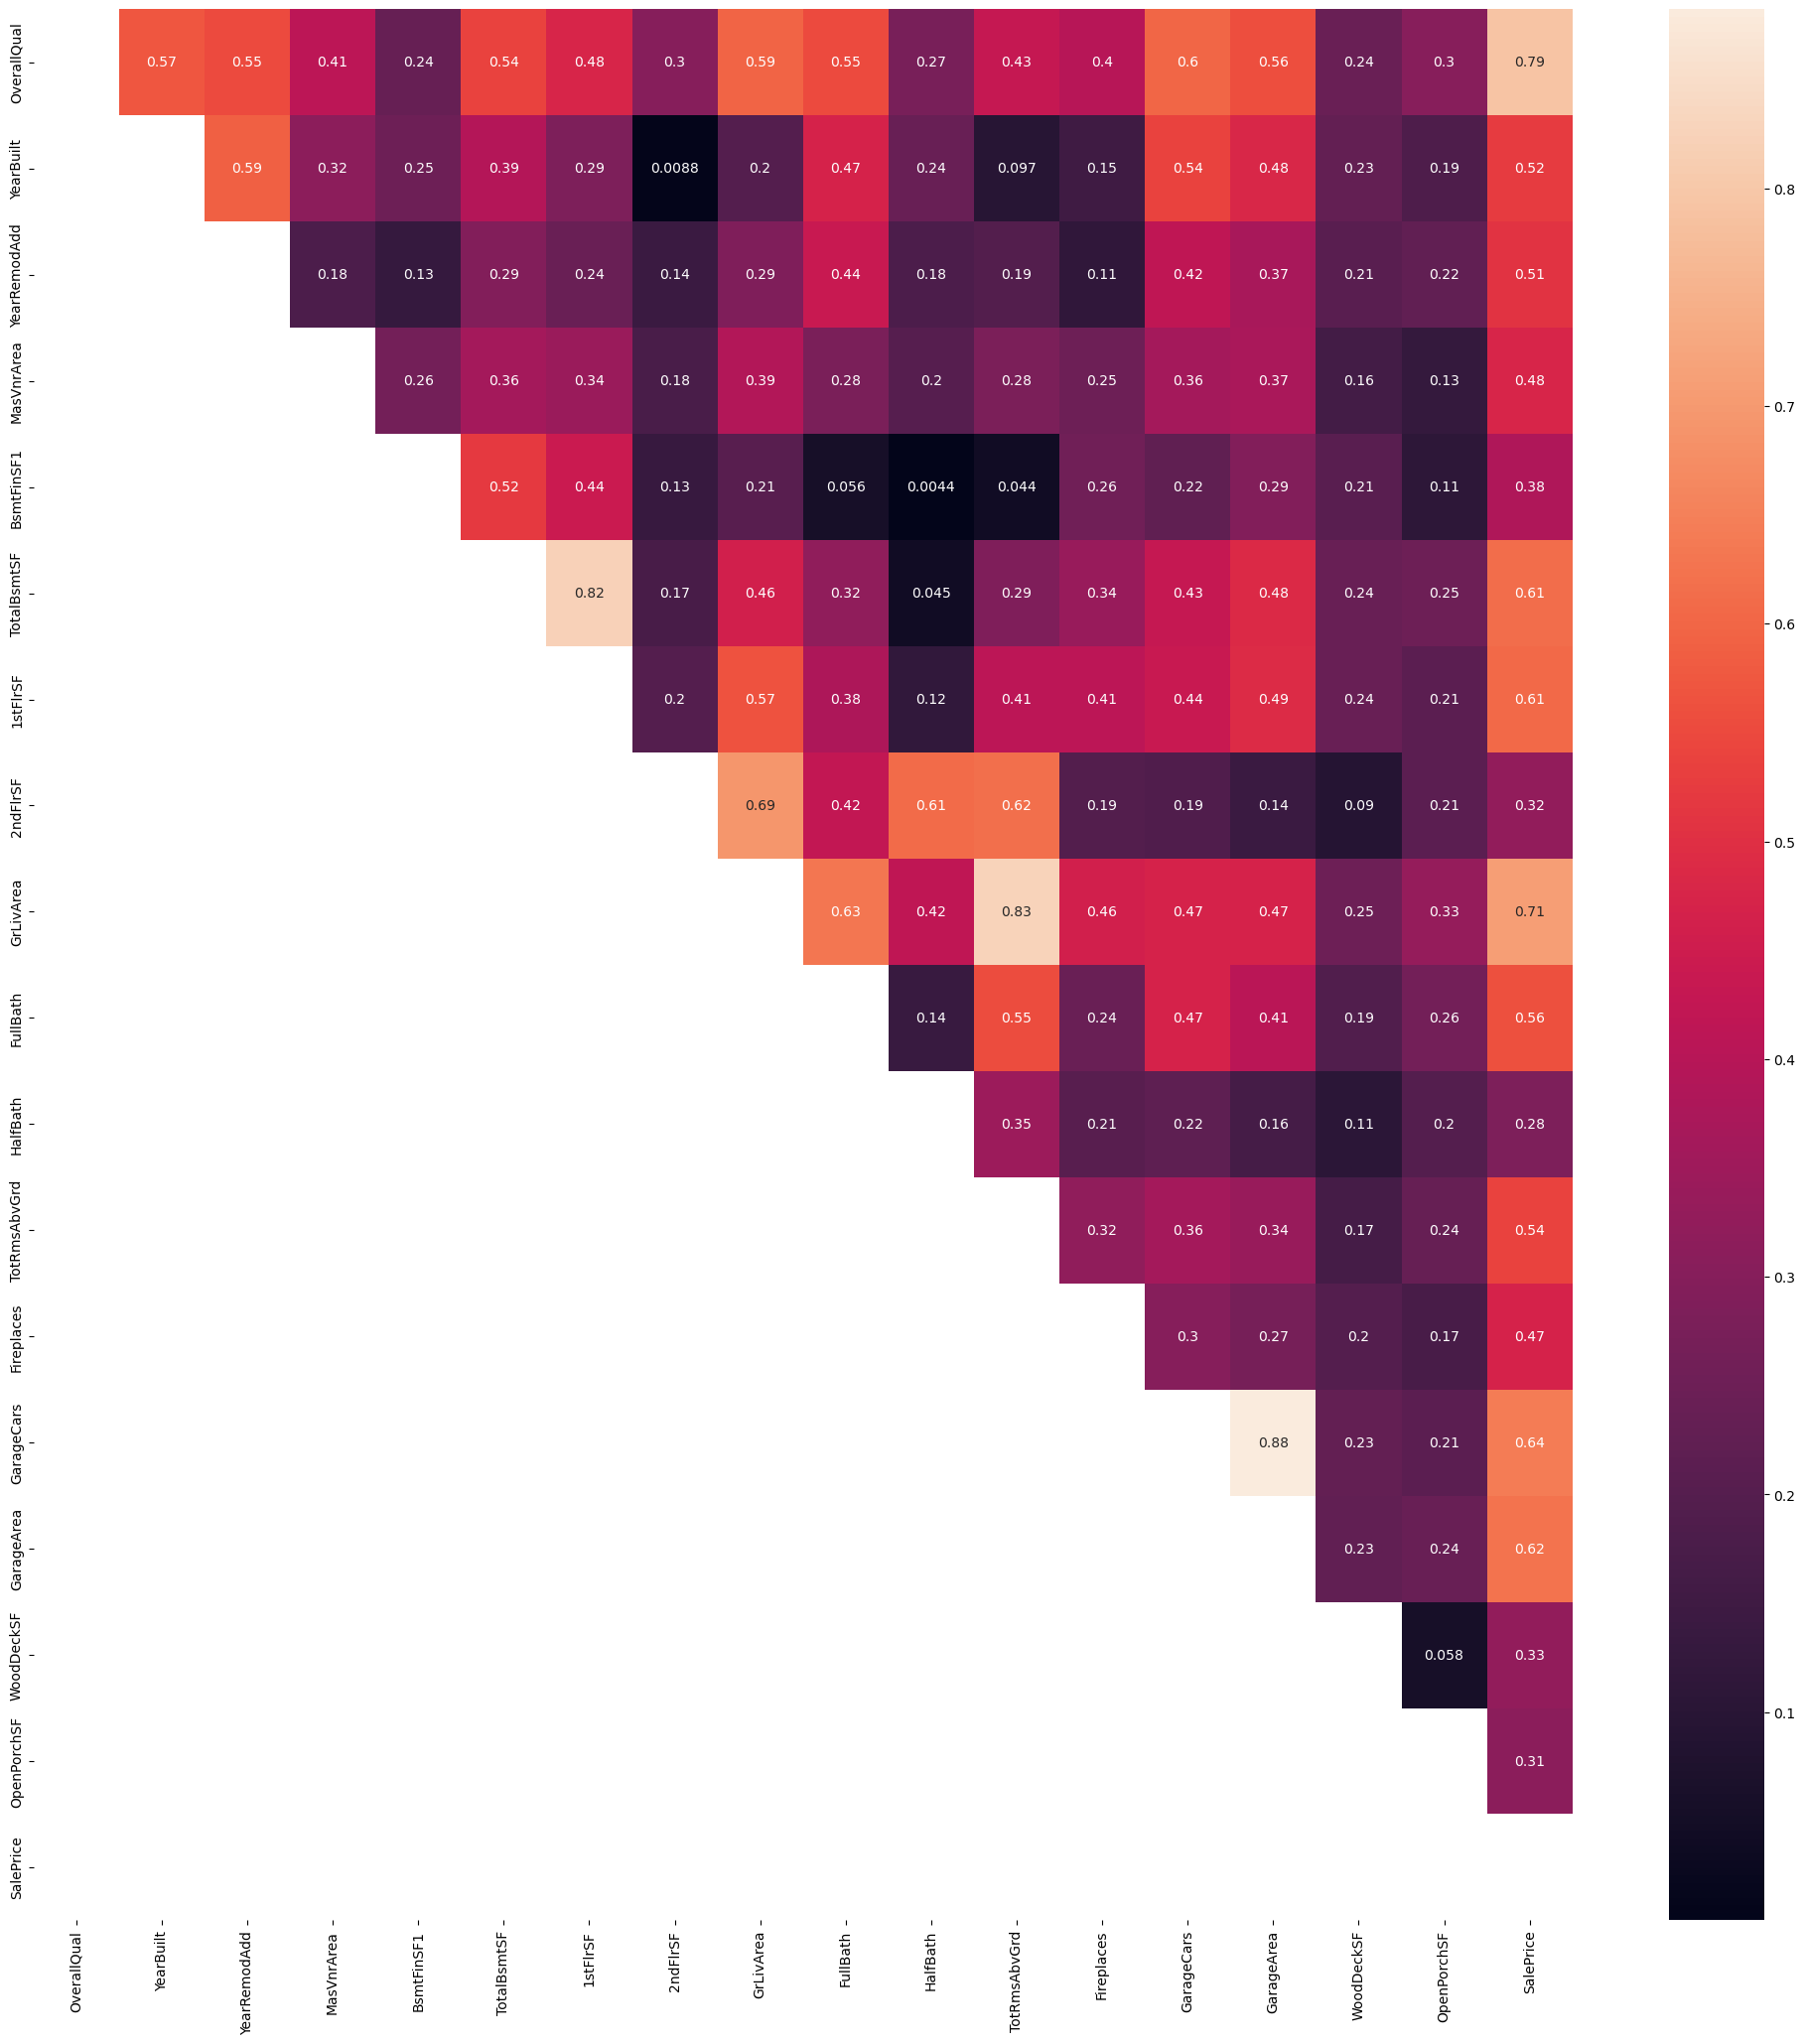

In [80]:
plt.figure(figsize=(25,25))
corr_mat = df[numeric_cols].corr()
heat_mat = corr_mat.where(np.triu(np.ones_like(corr_mat),k=1).astype('bool'))
sns.heatmap(abs(heat_mat),annot=True)
plt.show()

In [81]:
heat_mat = abs(heat_mat)

In [84]:
heat_mat=  heat_mat.sort_values(['SalePrice'],ascending=False)

In [85]:
heat_mat = heat_mat.drop('SalePrice',axis=1)

In [112]:
numeric_cols = [col for col in heat_mat.columns if (heat_mat[col] > 0.51)[heat_mat[col] > 0.51].sum()]

In [115]:
df = df.drop(numeric_cols,axis=1)

In [116]:
df

OverallQual  MasVnrArea  BsmtFinSF1  2ndFlrSF  Fireplaces  WoodDeckSF  \
0               7       196.0         706       854           0           0   
1               6         0.0         978         0           1         298   
2               7       162.0         486       866           1           0   
3               7         0.0         216       756           1           0   
4               8       350.0         655      1053           1         192   
...           ...         ...         ...       ...         ...         ...   
1455            6         0.0           0       694           1           0   
1456            6       119.0         790         0           2         349   
1457            7         0.0         275      1152           2           0   
1458            5         0.0          49         0           0         366   
1459            5         0.0         830         0           0         736   

      OpenPorchSF  SalePrice  Reg  other_lot_types  ...  TA  Attchd  Basment  \
0              61     208500    1                0  ...   0       1        0   
1               0     181500    1                0  ...   1       1        0   
2              42     223500    0                0  ...   1       1        0   
3              35     140000    0                0  ...   0       0        0   
4              84     250000    0                0  ...   1       1        0   
...           ...        ...  ...              ...  ...  ..     ...      ...   
1455           40     175000    1                0  ...   1       1        0   
1456            0     210000    1                0  ...   1       1        0   
1457           60     266500    1                0  ...   0       1        0   
1458            0     142125    1                0  ...   0       1        0   
1459           68     147500    1                0  ...   0       1        0   

      BuiltIn  CarPort  Detchd  No Garage  No Garage  RFn  Unf  
0           0        0       0          0          0    1    0  
1           0        0       0          0          0    1    0  
2           0        0       0          0          0    1    0  
3           0        0       1          0          0    0    1  
4           0        0       0          0          0    1    0  
...       ...      ...     ...        ...        ...  ...  ...  
1455        0        0       0          0          0    1    0  
1456        0        0       0          0          0    0    1  
1457        0        0       0          0          0    1    0  
1458        0        0       0          0          0    0    1  
1459        0        0       0          0          0    0    0  

[1449 rows x 95 columns]

1

In [96]:
col

NameError: name 'col' is not defined